# Hillforts Primer<br>
##An Analysis of the Atlas of Hillforts of Britain and Ireland<br>
## Part 3<br>
Mike Middleton, March 2022<br>https://orcid.org/0000-0001-5813-6347

## THIS DOCUMENT IS A WORK IN PROGRESS 

## Part 1: Name, Admin & Location Data
https://colab.research.google.com/drive/1C7HcuLuGGhG8o4EGciS-XTAhxVs3MhX3?usp=sharing

## Part 2: Management & Landscape
https://colab.research.google.com/drive/1lp4q0eFeNf7OMcnaQRi-hAsgDLzonF9x?usp=sharing

## **Part 3: Boundary & Dating**
https://colab.research.google.com/drive/1zcAnWVRubYXr9125DJZEelsxHDqh9Gvo?usp=sharing

## Part 4: Investigations & Interior
https://colab.research.google.com/drive/14PgOAgyCguv7oXovA2jMdO0oCBoZ9WRd?usp=sharing

## Part 5: Entrance, Enclosing & Annex
https://colab.research.google.com/drive/1DZPjacGv-uC4GfGr6HhUcOoD3xsUiW4q?usp=sharing

# User Settings

Pre-processed data and images are available for download (without the need to run the code in these files) here:<br> https://github.com/MikeDairsie/Hillforts-Primer.<br><br>
To download, save images or to change the background image to show the topography, first save a copy of this document into your Google Drive folder. Once saved, change download_data, save_images  and/or show_topography to **True** in the code blocks below, **Save** and then select **Runtime>Run all** in the main menu above to rerun the code. If selected, running the code will initiate the download and saving of files. Each document will download a number of data packages and you may be prompted to **allow** multiple downloads. Be patient, downloads may take a little time after the document has finished running. Note that each part of the Hillforts Primer is independent and the download, save_image and show_topography variables will need to be enabled in each document, if this functionality is required. Also note that saving images will activate the Google Drive folder and this will request the user to **allow** access. Selecting show_topograpy will change the background image to a colour topographic map. It should also be noted that, if set to True, this view will only show the distribution of the data selected. It will not show the overall distribution as a grey background layer as is seen when using the simple coastal outlines.

In [ ]:
download_data = False

In [ ]:
save_images = False

In [ ]:
show_topography = False

# Reload Data and Python Functions

## Source Data

The Atlas of Hillforts of Britain and Ireland data is made available under the licence, Attribution-ShareAlike 4.0 International (CC BY-SA 4.0). This allows for redistribution, sharing and transformation of the data, as long as the results are credited and made available under the same licence conditions.<br><br> 
The data was downloaded from The Atlas of Hillforts of Britain and Ireland website as a csv file (comma separated values) and saved onto the author’s GitHub repository thus enabling the data to be used by this document.

Lock, G. and Ralston, I. 2017.  Atlas of Hillforts of Britain and Ireland. [ONLINE] Available at: https://hillforts.arch.ox.ac.uk<br>
Rest services: https://maps.arch.ox.ac.uk/server/rest/services/hillforts/Atlas_of_Hillforts/MapServer<br>
Licence: https://creativecommons.org/licenses/by-sa/4.0/<br>
Help: https://hillforts.arch.ox.ac.uk/assets/help.pdf<br>
Data Structure: https://maps.arch.ox.ac.uk/assets/data.html<br>
Hillforts: Britain, Ireland and the Nearer Continent (Sample): https://www.archaeopress.com/ArchaeopressShop/DMS/A72C523E8B6742ED97BA86470E747C69/9781789692266-sample.pdf


## Python Modules and Code Setup

In [ ]:
# Ensure Python is ≥3.7
import sys
assert sys.version_info >= (3, 7)
print(f'Python: {sys.version}')

# Ensure Scikit-Learn is ≥1.0.2
import sklearn
assert sklearn.__version__ >= "1.0.2"
print(f'Scikit-Learn: {sklearn.__version__}')

# Ensure Pandas is ≥1.3.5
import pandas as pd
assert pd.__version__ >= "1.3.5"
print(f'pandas: {pd.__version__}')

# Ensure Numpy is ≥1.21.6
import numpy as np
assert np.__version__ >= "1.21.6"
print(f'numpy: {np.__version__}')

# Ensure matplotlib is ≥3.2.2
%matplotlib inline
import matplotlib
assert matplotlib.__version__ >= "3.2.2"
print(f'matplotlib: {matplotlib.__version__}')
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.patches as patches
from matplotlib.cbook import boxplot_stats
from matplotlib.lines import Line2D
import matplotlib.cm as cm

# Ensure Seaborn is ≥0.11.2
import seaborn as sns
assert sns.__version__ >= "0.11.2"
print(f'seaborn: {sns.__version__}')
sns.set(style="whitegrid")

# Ensure Scipy is ≥1.4.1
import scipy
assert scipy.__version__ >= "1.4.1"
print(f'scipy: {scipy.__version__}')
from scipy import stats
from scipy.stats import gaussian_kde

# Import Python libraries
import os
import collections
from slugify import slugify

# Import Google colab tools to access Drive
from google.colab import drive

Python: 3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]
Scikit-Learn: 1.0.2
pandas: 1.3.5
numpy: 1.21.6
matplotlib: 3.2.2
seaborn: 0.11.2
scipy: 1.7.3


Ref: https://www.python.org/<br>
Ref: https://scikit-learn.org/stable/<br>
Ref: https://pandas.pydata.org/docs/<br>
Ref: https://numpy.org/doc/stable/<br>
Ref: https://matplotlib.org/<br>
Ref: https://seaborn.pydata.org/<br>
Ref: https://docs.scipy.org/doc/scipy/index.html<br>
Ref: https://pypi.org/project/python-slugify/

In [ ]:
# # Ensure Python is ≥3.7
# import sys
# assert sys.version_info >= (3, 7)
# print(f'Python: {sys.version}')

# # Ensure Scikit-Learn is ≥1.0.2
# import sklearn
# assert sklearn.__version__ >= "1.0.2"
# print(f'Scikit-Learn: {sklearn.__version__}')

# # Ensure Pandas is ≥1.3.5
# import pandas as pd
# assert pd.__version__ >= "1.3.5"
# print(f'pandas: {pd.__version__}')

# # Ensure Numpy is ≥1.21.6
# import numpy as np
# assert np.__version__ >= "1.21.6"
# print(f'numpy: {np.__version__}')

# # Ensure matplotlib is ≥3.2.2
# %matplotlib inline
# import matplotlib
# assert matplotlib.__version__ >= "3.2.2"
# print(f'matplotlib: {matplotlib.__version__}')
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.patches as mpatches
# from matplotlib.cbook import boxplot_stats
# from matplotlib.lines import Line2D 

# # Ensure Seaborn is ≥0.11.2
# import seaborn as sns
# assert sns.__version__ >= "0.11.2"
# print(f'seaborn: {sns.__version__}')
# sns.set(style="whitegrid")

# # Ensure Scipy is ≥1.4.1
# import scipy
# assert scipy.__version__ >= "1.4.1"
# print(f'scipy: {scipy.__version__}')
# from scipy import stats
# from scipy.stats import gaussian_kde

# # Import Python libraries
# import os
# import collections
# from slugify import slugify

# # Import Google colab tools to access Drive
# from google.colab import drive

### Plot Figures and Maps functions

The following functions will be used to plot data later in the document.

In [ ]:
def show_records(plt, plot_data):
    text_colour = 'k'
    if show_topography == True:
        text_colour = 'w'
    plt.annotate(str(len(plot_data))+' records', xy=(-1180000, 6420000), xycoords='data', ha='left', color=text_colour)

In [ ]:
def get_backgrounds():
    if show_topography == True:
        backgrounds = ["hillforts-topo-01.png",
                    "hillforts-topo-north.png",
                    "hillforts-topo-northwest-plus.png",
                    "hillforts-topo-northwest-minus.png",
                    "hillforts-topo-northeast.png",
                    "hillforts-topo-south.png",
                    "hillforts-topo-south-plus.png",
                    "hillforts-topo-ireland.png",
                    "hillforts-topo-ireland-north.png",
                    "hillforts-topo-ireland-south.png"]
    else:
        backgrounds = ["hillforts-outline-01.png",
                    "hillforts-outline-north.png",
                    "hillforts-outline-northwest-plus.png",
                    "hillforts-outline-northwest-minus.png",
                    "hillforts-outline-northeast.png",
                    "hillforts-outline-south.png",
                    "hillforts-outline-south-plus.png",
                    "hillforts-outline-ireland.png",
                    "hillforts-outline-ireland-north.png",
                    "hillforts-outline-ireland-south.png"]
    return backgrounds

In [ ]:
def get_bounds():
    bounds = [[-1200000,220000,6400000,8700000],
    [-1200000,220000,7000000,8700000],
    [-1200000,-480000,7000000,8200000],
    [-900000,-480000,7100000,8200000],
    [-520000, 0,7000000,8700000],
    [-800000,220000,6400000,7100000],
    [-1200000,220000,6400000,7100000],
    [-1200000,-600000,6650000,7450000],
    [-1200000,-600000,7050000,7450000],
    [-1200000,-600000,6650000,7080000]]
    return bounds

In [ ]:
def show_background(plt, ax, location=""):
    backgrounds = get_backgrounds()
    bounds = get_bounds()
    folder = "https://raw.githubusercontent.com/MikeDairsie/Hillforts-Primer/main/hillforts-topo/"

    if location == "n":
        background = os.path.join(folder, backgrounds[1])
        bounds = bounds[1]
    elif location == "nw+":
        background = os.path.join(folder, backgrounds[2])
        bounds = bounds[2]
    elif location == "nw-":
        background = os.path.join(folder, backgrounds[3])
        bounds = bounds[3]
    elif location == "ne":
        background = os.path.join(folder, backgrounds[4])
        bounds = bounds[4]
    elif location == "s":
        background = os.path.join(folder, backgrounds[5])
        bounds = bounds[5]
    elif location == "s+":
        background = os.path.join(folder, backgrounds[6])
        bounds = bounds[6]
    elif location == "i":
        background = os.path.join(folder, backgrounds[7])
        bounds = bounds[7]
    elif location == "in":
        background = os.path.join(folder, backgrounds[8])
        bounds = bounds[8]
    elif location == "is":
        background = os.path.join(folder, backgrounds[9])
        bounds = bounds[9]
    else:
        background = os.path.join(folder, backgrounds[0])
        bounds = bounds[0]

    img = plt.imread(background)
    ax.imshow(img, extent=bounds)

In [ ]:
def get_counts(data):
    data_counts = []
    for col in data.columns:
        count = len(data[data[col] == 'Yes'])
        data_counts.append(count)
    return data_counts

In [ ]:
def add_annotation_plot(ax):
    ax.annotate("Middleton, M. 2022, Hillforts Primer", size='small', color='grey', xy=(0.01, 0.01), xycoords='figure fraction', horizontalalignment = 'left')
    ax.annotate("Source Data: Lock & Ralston, 2017. hillforts.arch.ox.ac.uk", size='small', color='grey', xy=(0.99, 0.01), xycoords='figure fraction', horizontalalignment = 'right')

In [ ]:
def add_annotation_l_xy(ax):
    ax.annotate("Middleton, M. 2022, Hillforts Primer", size='small', color='grey', xy=(0.01, 0.035), xycoords='figure fraction', horizontalalignment = 'left')
    ax.annotate("Source Data: Lock & Ralston, 2017. hillforts.arch.ox.ac.uk", size='small', color='grey', xy=(0.99, 0.035), xycoords='figure fraction', horizontalalignment = 'right')

In [ ]:
def plot_bar_chart(data, split_pos, x_label, y_label, title):
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_axes([0,0,1,1])
    x_data = data.columns
    x_data = [x.split("_")[split_pos:] for x in x_data]
    x_data_new = []
    for l in x_data :
        txt =  ""
        for part in l:
            txt += "_" + part
        x_data_new.append(txt[1:])
    y_data = get_counts(data)
    ax.bar(x_data_new,y_data)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    add_annotation_plot(ax)
    plt.title(get_print_title(title))
    save_fig(title)
    plt.show()

In [ ]:
def plot_bar_chart_using_two_tables(x_data, y_data, x_label, y_label, title):
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_axes([0,0,1,1])
    ax.bar(x_data,y_data)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    add_annotation_plot(ax)
    plt.title(get_print_title(title))
    save_fig(title)
    plt.show()

In [ ]:
def plot_bar_chart_numeric(data, split_pos, x_label, y_label, title, n_bins):
    new_data = data.copy()
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_axes([0,0,1,1])
    data[x_label].plot(kind='hist', bins = n_bins)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    add_annotation_plot(ax)
    plt.title(get_print_title(title))
    save_fig(title)
    plt.show()

In [ ]:
def plot_bar_chart_value_counts(data, x_label, y_label, title):
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_axes([0,0,1,1])
    df = data.value_counts()
    x_data = df.index.values
    y_data = df.values
    ax.bar(x_data,y_data)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    add_annotation_plot(ax)
    plt.title(get_print_title(title))
    save_fig(title)
    plt.show()

In [ ]:
def get_bins(data, bins_count):
    data_range = data.max() - data.min()
    print(bins_count)
    if bins_count != None:
        x_bins = [x for x in range(data.min(), data.max(), bins_count)]
        n_bins = len(x_bins)
    else:
        n_bins = int(data_range)
        if n_bins < 10:
            multi = 10
            while n_bins< 10:
                multi *= 10
                n_bins = int(data_range * multi)
        elif n_bins > 100:
            n_bins = int(data_range)/10

    return n_bins

In [ ]:
def plot_histogram(data, x_label, title, bins_count = None):
    n_bins = get_bins(data, bins_count)
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_axes([0,0,1,1])
    ax.set_xlabel(x_label)
    ax.set_ylabel('Count')
    plt.ticklabel_format(style='plain')
    plt.hist(data, bins=n_bins)
    plt.title(get_print_title(title))
    add_annotation_plot(ax)
    save_fig(title)
    plt.show() 

In [ ]:
def plot_continuous(data, x_lable, title):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_axes([0,0,1,1])
    ax.set_xlabel(x_lable)
    plt.plot(data, linewidth=4)
    plt.ticklabel_format(style='plain')
    plt.title(get_print_title(title))
    add_annotation_plot(ax)
    save_fig(title)
    plt.show()

In [ ]:
# box plot
from matplotlib.cbook import boxplot_stats  
def plot_data_range(data, feature, o="v"):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_axes([0,0,1,1])
    ax.set_xlabel(feature)
    add_annotation_plot(ax)
    plt.title(get_print_title(feature + " Range"))
    plt.ticklabel_format(style='plain')
    if o == "v":
        sns.boxplot(data=data, orient="v")
    else:
        sns.boxplot(data=data, orient="h")
    save_fig(feature + " Range")
    plt.show()

    bp = boxplot_stats(data)

    low = bp[0].get('whislo')
    q1 = bp[0].get('q1')
    median =  bp[0].get('med')
    q3 = bp[0].get('q3')
    high = bp[0].get('whishi')

    return [low, q1, median, q3, high]

In [ ]:
def location_XY_plot():
    plt.ticklabel_format(style='plain')
    plt.xlim(-1200000,220000)
    plt.ylim(6400000,8700000)
    add_annotation_l_xy(plt)

In [ ]:
def add_grey(region=''):
    if show_topography == False:
        # plots all the hillforts as a grey background
        loc = location_data.copy()
        if region == 's':
            loc = loc[loc['Location_Y'] < 8000000].copy()
            loc = loc[loc['Location_X'] > -710000].copy()
        elif region == 'ne':
            loc = loc[loc['Location_Y'] < 8000000].copy()
            loc = loc[loc['Location_X'] > -800000].copy()

        plt.scatter(loc['Location_X'], loc['Location_Y'], c='Silver')

In [ ]:
def plot_over_grey_numeric(merged_data, a_type, title, extra="", inner=False, fringe=False, oxford=False,swindon=False):
    plot_data = merged_data
    fig, ax = plt.subplots(figsize=(14.2 * 0.66, 23.0 * 0.66))
    show_background(plt, ax)
    location_XY_plot()
    add_grey()
    patches = add_oxford_swindon(oxford,swindon)
    plt.scatter(plot_data['Location_X'], plot_data['Location_Y'], c='Red')
    if fringe:
        f_for_legend = add_21Ha_fringe()
        patches.append(f_for_legend)
    if inner:
        i_for_legend = add_21Ha_line()
        patches.append(i_for_legend)
    show_records(plt, plot_data)
    plt.legend(loc='upper left', handles= patches)
    plt.title(get_print_title(title))
    save_fig(title)
    plt.show()

In [ ]:
def plot_over_grey_boundary(merged_data, a_type, boundary_type):
    plot_data = merged_data[merged_data[a_type] == boundary_type]
    fig, ax = plt.subplots(figsize=(9.47, 15.33))
    show_background(plt, ax)
    location_XY_plot()
    add_grey(region='')
    plt.scatter(plot_data['Location_X'], plot_data['Location_Y'], c='Red')
    show_records(plt, plot_data)
    plt.title(get_print_title('Boundary_Type: ' + boundary_type))
    save_fig('Boundary_Type_' + boundary_type)
    plt.show()

In [ ]:
def plot_density_over_grey(data, data_type):
    new_data = data.copy()
    new_data = new_data.drop(['Density'], axis=1)
    new_data = add_density(new_data)
    fig, ax = plt.subplots(figsize=((14.2 * 0.66)+2.4, 23.0 * 0.66))
    show_background(plt, ax)
    location_XY_plot()
    add_grey()
    plt.scatter(new_data['Location_X'], new_data['Location_Y'], c=new_data['Density'], cmap=cm.rainbow, s=25)
    plt.colorbar(label='Density')
    plt.title(get_print_title(f'Density - {data_type}'))
    save_fig(f'Density_{data_type}')
    plt.show()

In [ ]:
def add_21Ha_line():
    x_values = [-367969, -344171, -263690, -194654, -130542, -119597, -162994, -265052]#, -304545]
    y_values = [7019842, 6944572, 6850593, 6779602, 6735058, 6710127, 6684152, 6663609]#, 6611780]
    plt.plot(x_values, y_values, 'k', ls='-', lw=15, alpha=0.25, label = '≥ 21 Ha Line')
    add_to_legend = Line2D([0], [0], color='k', lw=15, alpha=0.25, label = '≥ 21 Ha Line')
    return add_to_legend

In [ ]:
def add_21Ha_fringe():
    x_values = [-367969,-126771,29679,-42657,-248650,-304545,-423647,-584307,-367969]
    y_values = [7019842,6847138,6671658,6596650,6554366,6611780,6662041,6752378,7019842]
    plt.plot(x_values, y_values, 'k', ls=':', lw=5, alpha=0.45, label = '≥ 21 Ha Fringe')
    add_to_legend = Line2D([0], [0], color='k', ls=':', lw=5, alpha=0.45, label = '≥ 21 Ha Fringe')
    return add_to_legend

In [ ]:
def add_oxford_swindon(oxford=False,swindon=False):
    # plots a circle over Swindon & Oxford
    radius = 50
    marker_size = (2*radius)**2
    patches = []
    if oxford:
        plt.scatter(-144362,6758380, c='dodgerblue', s=marker_size, alpha=0.50)  
        b_patch = mpatches.Patch(color='dodgerblue', label='Oxford orbit')
        patches.append(b_patch)
    if swindon:
        plt.scatter(-197416, 6721977, c='yellow', s=marker_size, alpha=0.50)
        y_patch = mpatches.Patch(color='yellow', label='Swindon orbit')
        patches.append(y_patch)
    return patches

In [ ]:
def plot_over_grey(merged_data, a_type, yes_no, extra="", inner=False, fringe=False, oxford=False,swindon=False):
    # plots selected data over the grey dots. yes_no controlls filtering the data for a positive or negative values.
    plot_data = merged_data[merged_data[a_type] == yes_no]
    fig, ax = plt.subplots(figsize=(14.2 * 0.66, 23.0 * 0.66))
    show_background(plt, ax)
    location_XY_plot()
    add_grey()
    patches = add_oxford_swindon(oxford,swindon)
    plt.scatter(plot_data['Location_X'], plot_data['Location_Y'], c='Red')
    if fringe:
        f_for_legend = add_21Ha_fringe()
        patches.append(f_for_legend)
    if inner:
        i_for_legend = add_21Ha_line()
        patches.append(i_for_legend)
    show_records(plt, plot_data)
    plt.legend(loc='upper left', handles= patches)
    plt.title(get_print_title(f'{a_type} {extra}'))
    save_fig(f'{a_type}_{extra}')
    plt.show()
    print(f'{round((len(plot_data)/len(merged_data)*100), 2)}%')
    return plot_data

In [ ]:
def plot_type_values(data, data_type, title):
    new_data = data.copy()
    fig, ax = plt.subplots(figsize=((14.2 * 0.66)+2.4, 23.0 * 0.66))
    show_background(plt, ax)
    location_XY_plot()
    plt.scatter(new_data['Location_X'], new_data['Location_Y'], c=new_data[data_type], cmap=cm.rainbow, s=25)
    plt.colorbar(label=data_type)
    plt.title(get_print_title(title))
    save_fig(title)
    plt.show()

In [ ]:
def bespoke_plot(plt, title):
    add_annotation_plot(plt)
    plt.ticklabel_format(style='plain')
    plt.title(get_print_title(title))
    save_fig(title)
    plt.show()

In [ ]:
def get_proportions(date_set):
    total = sum(date_set) - date_set[-1]
    newset = []
    for entry in date_set[:-1]:
        newset.append(round(entry/total,2))
    return newset

In [ ]:
def plot_dates_by_region(nw,ne,ni,si,s, features):
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_axes([0,0,1,1])
    x_data = nw[features].columns
    x_data = [x.split("_")[2:] for x in x_data][:-1]
    x_data_new = []
    for l in x_data:
        txt =  ""
        for part in l:
            txt += "_" + part
        x_data_new.append(txt[1:])

    set1_name = 'NW'
    set2_name = 'NE'
    set3_name = 'N Ireland'
    set4_name = 'S Ireland'
    set5_name = 'South'
    set1 = get_proportions(get_counts(nw[features]))
    set2 = get_proportions(get_counts(ne[features]))
    set3 = get_proportions(get_counts(ni[features]))
    set4 = get_proportions(get_counts(si[features]))
    set5 = get_proportions(get_counts(s[features]))

    X_axis = np.arange(len(x_data_new))

    budge = 0.25

    plt.bar(X_axis - 0.55 + budge, set1, 0.3, label = set1_name)
    plt.bar(X_axis - 0.4 + budge, set2, 0.3, label = set2_name)
    plt.bar(X_axis - 0.25 + budge, set3, 0.3, label = set3_name)
    plt.bar(X_axis - 0.1 + budge, set4, 0.3, label = set4_name)
    plt.bar(X_axis + 0.05 + budge, set5, 0.3, label = set5_name)

    plt.xticks(X_axis, x_data_new)
    plt.xlabel('Dating')
    plt.ylabel('Proportion of Total Dated Hillforts in Region')
    plt.title('Proportions of Dated Hillforts by Region')
    plt.legend()
    add_annotation_plot(ax)
    plt.show()

### Review Data Functions

The following functions will be used to confirm that features are not lost or forgotten when splitting the data.

In [ ]:
def test_numeric(data):
    temp_data = data.copy()
    columns = data.columns
    out_cols = ['Feature','Entries', 'Numeric', 'Non-Numeric', 'Null']
    feat, ent, num, non, nul = [],[],[],[],[]
    for col in columns:
        if temp_data[col].dtype == 'object':
            feat.append(col)
            temp_data[col+'_num'] = temp_data[col].str.isnumeric()
            entries = temp_data[col].notnull().sum()
            true_count = temp_data[col+'_num'][temp_data[col+'_num'] == True].sum()
            null_count = temp_data[col].isna().sum()
            ent.append(entries)
            num.append(true_count)
            non.append(entries-true_count)
            nul.append(null_count)
        else:
            print(f'{col} {temp_data[col].dtype}')
    summary = pd.DataFrame(list(zip(feat, ent, num, non, nul)))
    summary.columns = out_cols
    return summary

In [ ]:
def find_duplicated(numeric_data, text_data, encodeable_data):
    d = False
    all_columns = list(numeric_data.columns) + list(text_data.columns) + list(encodeable_data.columns)
    duplicate = [item for item, count in collections.Counter(all_columns).items() if count > 1]
    if duplicate :
        print(f"There are duplicate features: {duplicate}")
        d = True
    return d

In [ ]:
def test_data_split(main_data, numeric_data, text_data, encodeable_data):
    m = False
    split_features = list(numeric_data.columns) + list(text_data.columns) + list(encodeable_data.columns)
    missing = list(set(main_data)-set(split_features))
    if missing:
        print(f"There are missing features: {missing}")
        m = True
    return m

In [ ]:
def review_data_split(main_data, numeric_data, text_data, encodeable_data = pd.DataFrame()):
    d = find_duplicated(numeric_data, text_data, encodeable_data)
    m = test_data_split(main_data, numeric_data, text_data, encodeable_data)
    if d != True and m != True:
        print("Data split good.")

In [ ]:
def find_duplicates(data):
    print(f'{data.count() - data.duplicated(keep=False).count()} duplicates.')

In [ ]:
def count_yes(data):
    total = 0
    for col in data.columns:
        count = len(data[data[col] == 'Yes'])
        total+= count
        print(f'{col}: {count}')
    print(f'Total yes count: {total}')

### Null Value Functions

The following functions will be used to update null values.

In [ ]:
def fill_nan_with_minus_one(data, feature):
    new_data = data.copy()
    new_data[feature] = data[feature].fillna(-1)
    return new_data

In [ ]:
def fill_nan_with_NA(data, feature):
    new_data = data.copy()
    new_data[feature] = data[feature].fillna("NA")
    return new_data

In [ ]:
def test_numeric_value_in_feature(feature, value):
    test = feature.isin([-1]).sum()
    return test

In [ ]:
def test_catagorical_value_in_feature(dataframe, feature, value):
    test = dataframe[feature][dataframe[feature] == value].count()
    return test

In [ ]:
def test_cat_list_for_NA(dataframe, cat_list):
    for val in cat_list:
        print(val, test_catagorical_value_in_feature(dataframe, val,'NA'))

In [ ]:
def test_num_list_for_minus_one(dataframe, num_list):
    for val in num_list:
        feature = dataframe[val]
        print(val, test_numeric_value_in_feature(feature, -1))

In [ ]:
def update_cat_list_for_NA(dataframe, cat_list):
    new_data = dataframe.copy()
    for val in cat_list:
        new_data = fill_nan_with_NA(new_data, val)
    return new_data

In [ ]:
def update_num_list_for_minus_one(dataframe, cat_list):
    new_data = dataframe.copy()
    for val in cat_list:
        new_data = fill_nan_with_minus_one(new_data, val)
    return new_data

### Reprocessing Functions

In [ ]:
def add_density(data):
    new_data = data.copy()
    xy = np.vstack([new_data['Location_X'],new_data['Location_Y']])
    new_data['Density'] = gaussian_kde(xy)(xy)
    return new_data

### Save Image Functions

In [ ]:
fig_no = 0
part = 'Part03'

In [ ]:
def get_file_name(title):
    file_name = slugify(title)
    return file_name

In [ ]:
def get_print_title(title):
    title = title.replace("_", " ")
    return title

In [ ]:
def format_figno(no):
    length = len(str(no))
    fig_no = ''
    for i in range(3-length):
        fig_no = fig_no + '0'
    fig_no = fig_no + str(no)
    return fig_no

In [ ]:
if save_images == True:
    drive.mount('/content/drive')
    os.getcwd()
else:
    pass

Mounted at /content/drive


# CHANGE PATH!!

In [ ]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    global fig_no
    if save_images:
        #IMAGES_PATH = r'/content/drive/My Drive/'
        IMAGES_PATH = r'/content/drive/My Drive/Colab Notebooks/Hillforts_Primer_Images/'
        fig_no+=1
        fig_no_txt = format_figno(fig_no)
        file_name = get_file_name(f'{part}_{fig_no_txt}_{fig_id}')
        file_name = f'{file_name}.{fig_extension}'
        path = os.path.join(IMAGES_PATH, file_name)
        print("Saving figure", file_name)
        plt.tight_layout()
        plt.savefig(path, format=fig_extension, dpi=resolution,  bbox_inches='tight')
    else:
        pass

## Load Data

The source csv file is loaded and the first two rows are displayed to confirm the load was successful. Note that, to the left, an index has been added automatically. This index will be used frequently when splitting and remerging data extracts.

In [ ]:
hillforts_csv = r"https://raw.githubusercontent.com/MikeDairsie/Hillforts-Primer/main/hillforts-atlas-source-data-csv/hillforts.csv"
hillforts_data = pd.read_csv(hillforts_csv, index_col=False)
pd.set_option('max_columns', None, 'display.max_rows', None)
hillforts_data.head(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10,12,68,83,84,85,86,165,183) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


OBJECTID  Main_Atlas_Number Main_Country_Code Main_Country  \
0         1                  1                EN      England   
1         2                  2                EN      England   

                       Main_Title_Name Main_Site_Name    Main_Alt_Name  \
0  EN0001 Aconbury Camp, Herefordshire  Aconbury Camp  Aconbury Beacon   
1      EN0002 Bach Camp, Herefordshire      Bach Camp              NaN   

                                Main_Display_Name       Main_HER Main_HER_PRN  \
0  Aconbury Camp, Herefordshire (Aconbury Beacon)  Herefordshire       MHE413   
1                        Bach Camp, Herefordshire  Herefordshire        MHE52   

  Main_HER_ID Main_NMR_Mapsheet Main_NMR_ID  Main_SM  \
0         910        SO 53 SW 1      110371  1001754   
1         344        SO 56 SW 3      110884  1007316   

                                        Main_Summary Main_Boundary  \
0  Large, wooded, univallate, partial contour hil...            No   
1  Univallate, contour hillfort located on summit...            No   

  Main_Coordinate_System  Main_X  Main_Y Status_Citizen_Science  \
0                 OSGB36  350350  233050                     No   
1                 OSGB36  354700  260200                     No   

  Status_Citizen Status_Data_Reliability Status_Data_Comments  \
0            NaN               Confirmed                  NaN   
1            NaN               Confirmed                  NaN   

  Status_Interpretation_Reliability Status_Interpretation_Comments  \
0                         Confirmed                            NaN   
1                         Confirmed                            NaN   

  Location_NGR  Location_X  Location_Y  Location_Longitude  Location_Latitude  \
0    SO 503330     -303295     6798973           -2.724548          51.993628   
1    SO 547602     -296646     6843289           -2.664819          52.238082   

  Location_Current_County Location_Historic_County Location_Current_Parish  \
0           Herefordshire            Herefordshire                Aconbury   
1           Herefordshire            Herefordshire               Kimbolton   

  Management_Condition_Extant Management_Condition_Cropmark  \
0                         Yes                            No   
1                         Yes                            No   

  Management_Condition_Destroyed  \
0                             No   
1                             No   

                       Management_Condition_Comments  \
0  Main ditch gone on N and W sides. Visitor eros...   
1  Natural and animal erosion with sheep scrapes....   

  Management_Land_Use_Woodland Management_Land_Use_Plantation  \
0                          Yes                             No   
1                           No                             No   

  Management_Land_Use_Parkland Management_Land_Use_Pasture  \
0                           No                          No   
1                           No                         Yes   

  Management_Land_Use_Arable Management_Land_Use_Scrub  \
0                         No                       Yes   
1                         No                       Yes   

  Management_Land_Use_Outcrop Management_Land_Use_Moorland  \
0                          No                           No   
1                          No                           No   

  Management_Land_Use_Heath Management_Land_Use_Urban  \
0                        No                        No   
1                        No                        No   

  Management_Land_Use_Coastal Management_Land_Use_Other  \
0                          No                       Yes   
1                          No                        No   

                        Management_Land_Use_Comments Landscape_Type_Contour  \
0  Mixed woodland since 19th century with interna...                     No   
1  Potatoes once grown on the site, but vegetatio...                    Yes   

  Landscape_Type_Partial Landscape_Type_Promontory Landscape_Type_Hills

### Download Function

In [ ]:
from google.colab import files
def download(data_list, filename, hf_data=hillforts_data):
    if download_data == True:
        name_and_number = hf_data[['Main_Atlas_Number','Main_Display_Name']].copy()
        dl = name_and_number.copy()
        for pkg in data_list:
            if filename not in ['england', 'wales','scotland','republic-of-ireland','norhtern-ireland', 'isle-of-man', 'roi-ni', 'eng-wal-sco-iom']:
                if pkg.shape[0] == hillforts_data.shape[0]:
                    dl = pd.merge(dl, pkg, left_index=True, right_index=True)
            else:
                dl = data_list[0]
        dl = dl.replace('\r',' ', regex=True)
        dl = dl.replace('\n',' ', regex=True)
        fn = 'Hillforts_' + filename
        fn = get_file_name(fn)
        dl.to_csv(fn+'.csv', index=False) 
        files.download(fn+'.csv')
    else:
        pass

### Reload Name and Number

The Main Atlas Number and the Main Display Name are the primary uninqe reference identiriers in the data. With these, users can identify any record numerically and by name. Throughout this document, the data will be clipped into a number of sub-data packages. Where needed, these data extracts will be combined with Name and Number features to ensure the data can be understood and can, if needed, be concorded.

In [ ]:
name_and_number_features = ['Main_Atlas_Number','Main_Display_Name']
name_and_number = hillforts_data[name_and_number_features].copy()
name_and_number.head()

Main_Atlas_Number                                  Main_Display_Name
0                  1     Aconbury Camp, Herefordshire (Aconbury Beacon)
1                  2                           Bach Camp, Herefordshire
2                  3    Backbury Camp, Herefordshire (Ethelbert's Camp)
3                  4                        Brandon Camp, Herefordshire
4                  5  British Camp, Herefordshire (Herefordshire Bea...

### Reload Location

In [ ]:
location_numeric_data_short_features = ['Location_X','Location_Y']
location_numeric_data_short = hillforts_data[location_numeric_data_short_features]
location_numeric_data_short = add_density(location_numeric_data_short)
location_numeric_data_short.head()
location_data = location_numeric_data_short.copy()
location_data.head()

Location_X  Location_Y       Density
0     -303295     6798973  1.632859e-12
1     -296646     6843289  1.540172e-12
2     -289837     6808611  1.547729e-12
3     -320850     6862993  1.670548e-12
4     -261765     6810587  1.369981e-12

### Reload Location Cluster Data Packages

In [ ]:
cluster_data = hillforts_data[['Location_X','Location_Y', 'Main_Country_Code']].copy()
cluster_data['Cluster'] = 'NA'
cluster_data['Cluster'].where(cluster_data['Main_Country_Code'] != 'NI', 'I', inplace=True)
cluster_data['Cluster'].where(cluster_data['Main_Country_Code'] != 'IR', 'I', inplace=True)

cluster_data['Cluster'] = np.where(
   (cluster_data['Cluster'] == 'I') & (cluster_data['Location_Y'] >= 7060000) , 'North Ireland', cluster_data['Cluster']
   )
north_ireland = cluster_data[cluster_data['Cluster'] == 'North Ireland'].copy()

cluster_data['Cluster'] = np.where(
   (cluster_data['Cluster'] == 'I') & (cluster_data['Location_Y'] < 7060000) , 'South Ireland', cluster_data['Cluster']
   )
south_ireland = cluster_data[cluster_data['Cluster'] == 'South Ireland'].copy()

cluster_data['Cluster'] = np.where(
   (cluster_data['Cluster'] == 'NA') & (cluster_data['Location_Y'] < 7070000) , 'South', cluster_data['Cluster']
   )
south = cluster_data[cluster_data['Cluster'] == 'South'].copy()

cluster_data['Cluster'] = np.where(
   (cluster_data['Cluster'] == 'NA') & (cluster_data['Location_Y'] >= 7070000) & (cluster_data['Location_X'] >= -500000), 'North East', cluster_data['Cluster']
   )
north_east = cluster_data[cluster_data['Cluster'] == 'North East'].copy()

cluster_data['Cluster'] = np.where(
   (cluster_data['Cluster'] == 'NA') & (cluster_data['Location_Y'] >= 7070000) & (cluster_data['Location_X'] < -500000), 'North West', cluster_data['Cluster']
   )
north_west = cluster_data[cluster_data['Cluster'] == 'North West'].copy()

temp_cluster_location_packages = [north_ireland, south_ireland, south, north_east, north_west]

cluster_packages = []
for pkg in temp_cluster_location_packages:
    pkg = pkg.drop(['Main_Country_Code'], axis=1)
    cluster_packages.append(pkg)

north_ireland, south_ireland, south, north_east, north_west = cluster_packages[0], cluster_packages[1], cluster_packages[2], cluster_packages[3], cluster_packages[4]

# Review Data Part 3

## Boundary Data

In [ ]:
boundary_features = [
 'Boundary_Boundary_Type',
 'Boundary_Boundary_Comments',
 'Boundary_Country_Code_2',
 'Boundary_HER_2',
 'Boundary_HER_PRN_2',
 'Boundary_Current_County_2',
 'Boundary_Historic_County_2',
 'Boundary_Current_Parish_2']

boundary_data = hillforts_data[boundary_features].copy()
boundary_data.head()

Boundary_Boundary_Type Boundary_Boundary_Comments Boundary_Country_Code_2  \
0                    NaN                        NaN                     NaN   
1                    NaN                        NaN                     NaN   
2                    NaN                        NaN                     NaN   
3                    NaN                        NaN                     NaN   
4                 County                        NaN                     NaN   

   Boundary_HER_2 Boundary_HER_PRN_2 Boundary_Current_County_2  \
0             NaN                NaN                       NaN   
1             NaN                NaN                       NaN   
2             NaN                NaN                       NaN   
3             NaN                NaN                       NaN   
4  Worcestershire           WSM00932            Worcestershire   

  Boundary_Historic_County_2  \
0                        NaN   
1                        NaN   
2                        NaN   
3                        NaN   
4             Worcestershire   

                           Boundary_Current_Parish_2  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4  Eastnor (Herefordshire); Little Malvern (Worce...

The boundary data is partial. Five of the features contain 20 records or less. There is so little data in these features, the recording bias, in these features, is to not record this type of information. With distributions this small there is no potential to review meaningful distributions of data. For this reason they will be deleted.

In [ ]:
boundary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147 entries, 0 to 4146
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Boundary_Boundary_Type      428 non-null    object
 1   Boundary_Boundary_Comments  259 non-null    object
 2   Boundary_Country_Code_2     7 non-null      object
 3   Boundary_HER_2              12 non-null     object
 4   Boundary_HER_PRN_2          10 non-null     object
 5   Boundary_Current_County_2   20 non-null     object
 6   Boundary_Historic_County_2  17 non-null     object
 7   Boundary_Current_Parish_2   360 non-null    object
dtypes: object(8)
memory usage: 259.3+ KB


### Boundary Numeric Data

There is no Boundary numeric data.

In [ ]:
boundary_numeric_data = pd.DataFrame()

### Boundary Text Data

There are 259 Boundary COmments.

In [ ]:
boundary_text_features = [
 'Boundary_Boundary_Comments']

boundary_text_data = boundary_data[boundary_text_features].copy()
boundary_text_data[boundary_text_data['Boundary_Boundary_Comments'].notna()].head()

Boundary_Boundary_Comments
9   Part of the site is located in Shropshire and ...
40      Part in Shropshire and part in Wales (Powys).
70  Part of site in Wales (Powys), part in England...
95  Formerly bisected by the historic counties of ...
96  Although situated entirely in Thatcham it lies...

### Boundary Text Data - Resolve Null Values

Test for 'NA'.

In [ ]:
test_cat_list_for_NA(boundary_text_data, boundary_text_features)

Boundary_Boundary_Comments 0


Fill null values with 'NA'.

In [ ]:
boundary_text_data = update_cat_list_for_NA(boundary_text_data, boundary_text_features)
boundary_text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147 entries, 0 to 4146
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Boundary_Boundary_Comments  4147 non-null   object
dtypes: object(1)
memory usage: 32.5+ KB


### Boundary Encodeable Data

In [ ]:
boundary_encodeable_features = [
 'Boundary_Boundary_Type',
 'Boundary_Country_Code_2',
 'Boundary_HER_2',
 'Boundary_HER_PRN_2',
 'Boundary_Current_County_2',
 'Boundary_Historic_County_2',
 'Boundary_Current_Parish_2']

boundary_encodeable_data = boundary_data[boundary_encodeable_features].copy()
boundary_encodeable_data.head()

Boundary_Boundary_Type Boundary_Country_Code_2  Boundary_HER_2  \
0                    NaN                     NaN             NaN   
1                    NaN                     NaN             NaN   
2                    NaN                     NaN             NaN   
3                    NaN                     NaN             NaN   
4                 County                     NaN  Worcestershire   

  Boundary_HER_PRN_2 Boundary_Current_County_2 Boundary_Historic_County_2  \
0                NaN                       NaN                        NaN   
1                NaN                       NaN                        NaN   
2                NaN                       NaN                        NaN   
3                NaN                       NaN                        NaN   
4           WSM00932            Worcestershire             Worcestershire   

                           Boundary_Current_Parish_2  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4  Eastnor (Herefordshire); Little Malvern (Worce...

In [ ]:
boundary_encodeable_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147 entries, 0 to 4146
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Boundary_Boundary_Type      428 non-null    object
 1   Boundary_Country_Code_2     7 non-null      object
 2   Boundary_HER_2              12 non-null     object
 3   Boundary_HER_PRN_2          10 non-null     object
 4   Boundary_Current_County_2   20 non-null     object
 5   Boundary_Historic_County_2  17 non-null     object
 6   Boundary_Current_Parish_2   360 non-null    object
dtypes: object(7)
memory usage: 226.9+ KB


#### Boundary Encodeable Data - Resolve Null Values

All features in this dataset contain null values and 'NA' is not currently present, as a value, in any of feature.

In [ ]:
test_cat_list_for_NA(boundary_encodeable_data, boundary_encodeable_features)

Boundary_Boundary_Type 0
Boundary_Country_Code_2 0
Boundary_HER_2 0
Boundary_HER_PRN_2 0
Boundary_Current_County_2 0
Boundary_Historic_County_2 0
Boundary_Current_Parish_2 0


Null values updated to 'NA'.

In [ ]:
boundary_encodeable_data = update_cat_list_for_NA(boundary_encodeable_data, boundary_encodeable_features)


In [ ]:
boundary_encodeable_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147 entries, 0 to 4146
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Boundary_Boundary_Type      4147 non-null   object
 1   Boundary_Country_Code_2     4147 non-null   object
 2   Boundary_HER_2              4147 non-null   object
 3   Boundary_HER_PRN_2          4147 non-null   object
 4   Boundary_Current_County_2   4147 non-null   object
 5   Boundary_Historic_County_2  4147 non-null   object
 6   Boundary_Current_Parish_2   4147 non-null   object
dtypes: object(7)
memory usage: 226.9+ KB


#### Boundary Type Plotted

In [ ]:
boundary_encodeable_data['Boundary_Boundary_Type'].value_counts()

NA                 3719
Parish/Townland     391
County               22
Other                 8
National              7
Name: Boundary_Boundary_Type, dtype: int64

In [ ]:
x_data = []
for bdry in list(pd.unique(boundary_encodeable_data['Boundary_Boundary_Type'])):
    x_data.append(bdry)

y_data = []
for entry in x_data:
    count = len(boundary_encodeable_data[boundary_encodeable_data['Boundary_Boundary_Type'] == entry])
    y_data.append(count)

Saving figure part03-001-boundary-boundary-type.png


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if sys.path[0] == '':


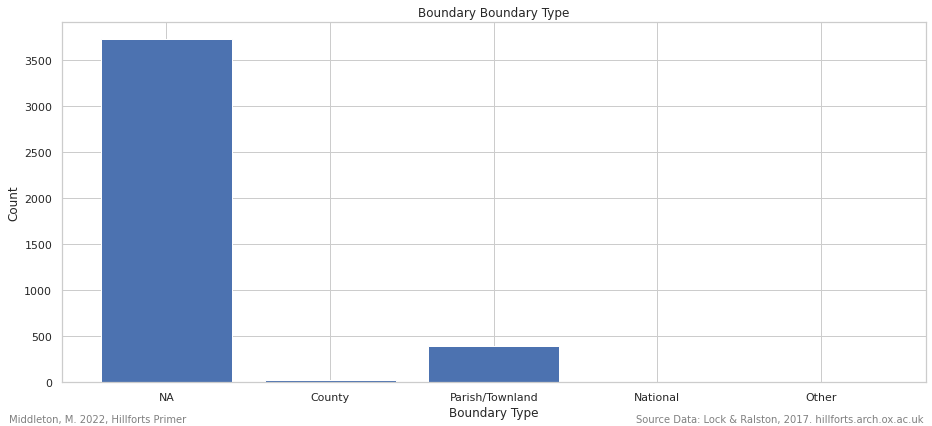

In [ ]:
plot_bar_chart_using_two_tables(x_data, y_data, 'Boundary Type', 'Count', 'Boundary_Boundary_Type')

#### Boundary Data Plotted (Excluding No Boundary information)

In [ ]:
x_data_short = x_data[1:]
y_data_short = y_data[1:]

Saving figure part03-002-boundary-type-excluding-null-values.png


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if sys.path[0] == '':


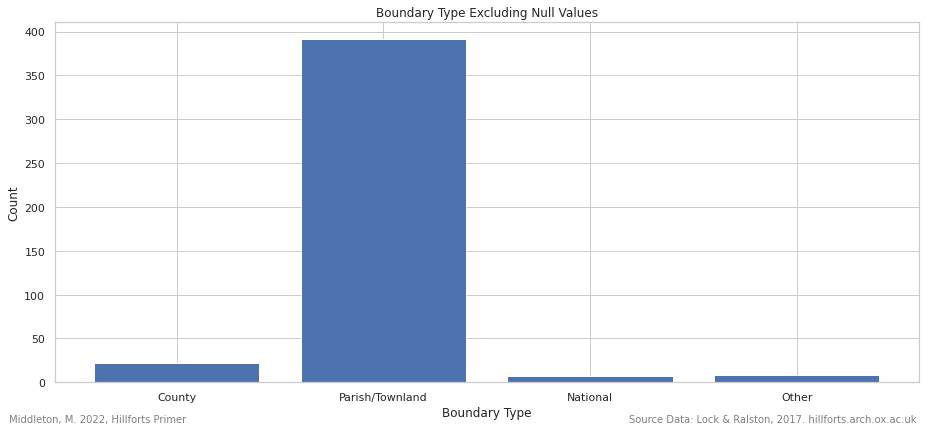

In [ ]:
plot_bar_chart_using_two_tables(x_data_short, y_data_short, 'Boundary Type', 'Count', 'Boundary_Type_Excluding_Null_Values')

#### Boundary Data Mapped

In [ ]:
location_boundary_data = pd.merge(location_numeric_data_short, boundary_encodeable_data, left_index=True, right_index=True)

##### No Boundary Data Mapped

The majority of hillforts have no associated boundary inforamtion.

Saving figure part03-003-boundary-type-na.png


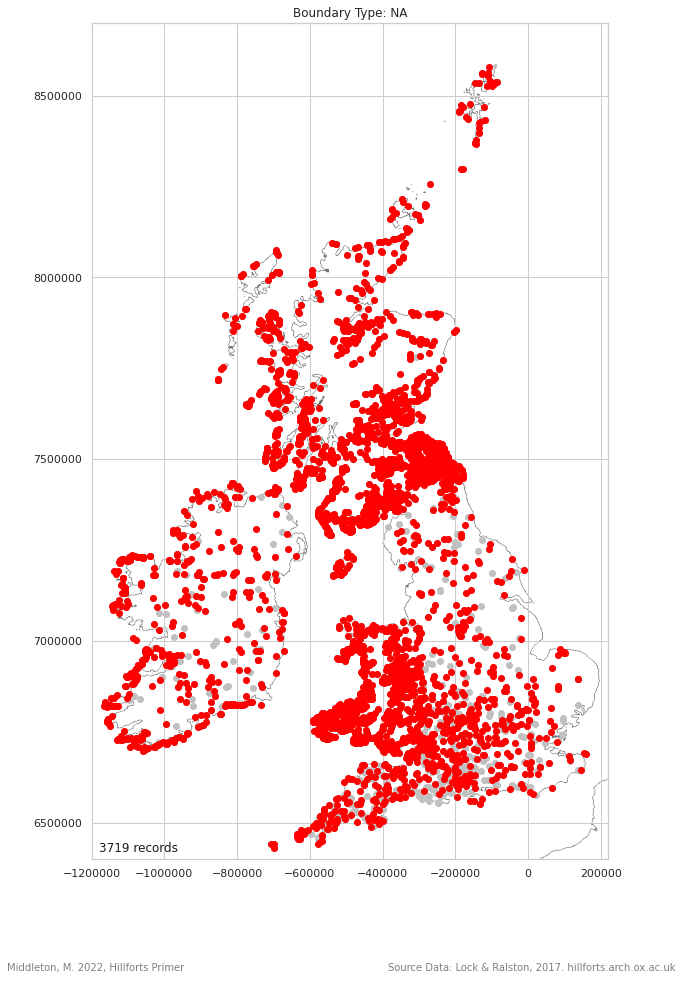

In [ ]:
plot_over_grey_boundary(location_boundary_data, 'Boundary_Boundary_Type', 'NA')

##### County Boundary Mapped

Only 22 hillforts have information relating to thier relationship to the county boundaries. 

Saving figure part03-004-boundary-type-county.png


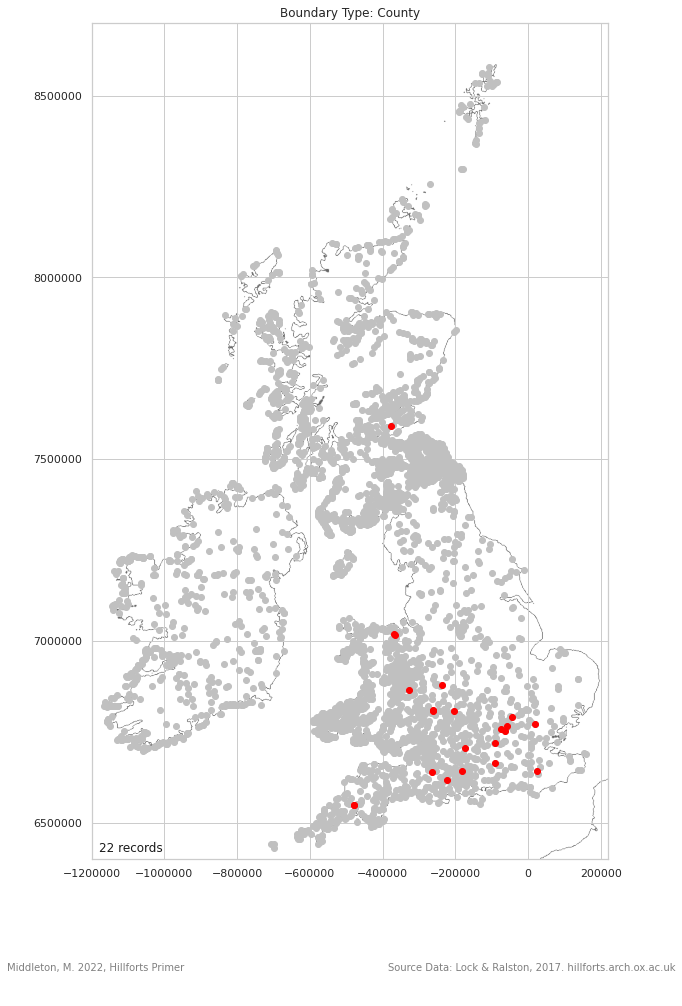

In [ ]:
plot_over_grey_boundary(location_boundary_data, 'Boundary_Boundary_Type', 'County')

##### National Boundary Mapped

Only seven records are recorded to coincide with a national boundary.

Saving figure part03-005-boundary-type-national.png


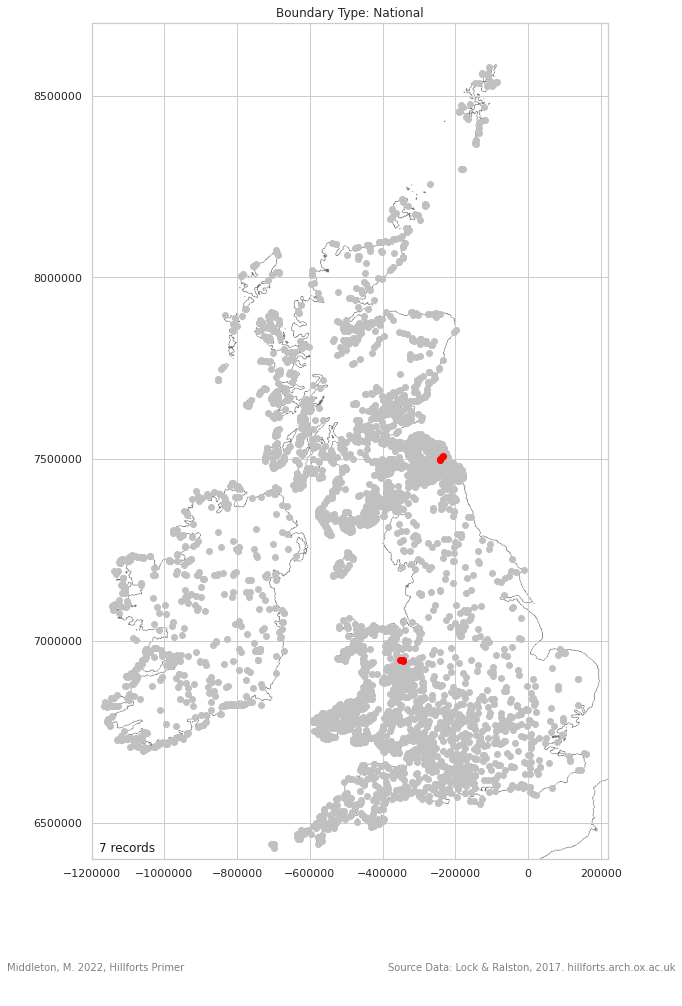

In [ ]:
plot_over_grey_boundary(location_boundary_data, 'Boundary_Boundary_Type', 'National')

<a name="bo_parish"></a>
##### Parish / Townland Boundary Mapped


Again, this distribution is biased in that it suffers from inconsistent recording in relation to this category of boundary. The data for England and the Republic of Ireland looks to have some coherance but the data for Scotland, Wales and Northern Ireland is patchy at best. There also seems to be recording bisas, caused by locallised intense recording, around Berwich and various locations accross the south of England. See: [Boundary Current Parish 2 Mapped](#bo_cp2).

Saving figure part03-006-boundary-type-parish-townland.png


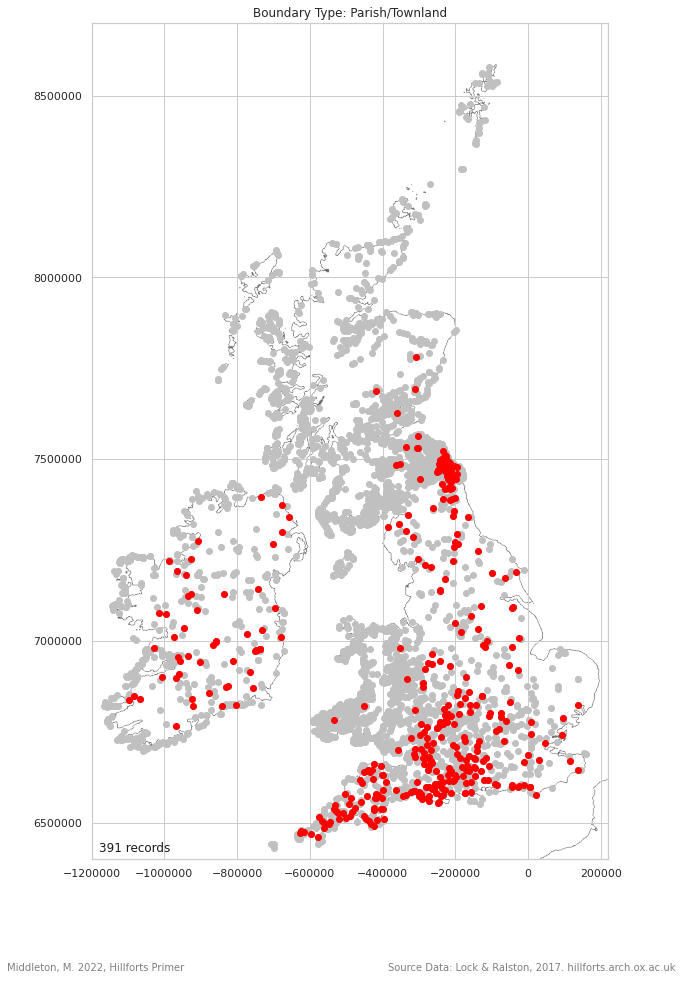

In [ ]:
plot_over_grey_boundary(location_boundary_data, 'Boundary_Boundary_Type', 'Parish/Townland')

##### Other Boundary Mapped

Only eight records coincide with this category of boundary.

Saving figure part03-007-boundary-type-other.png


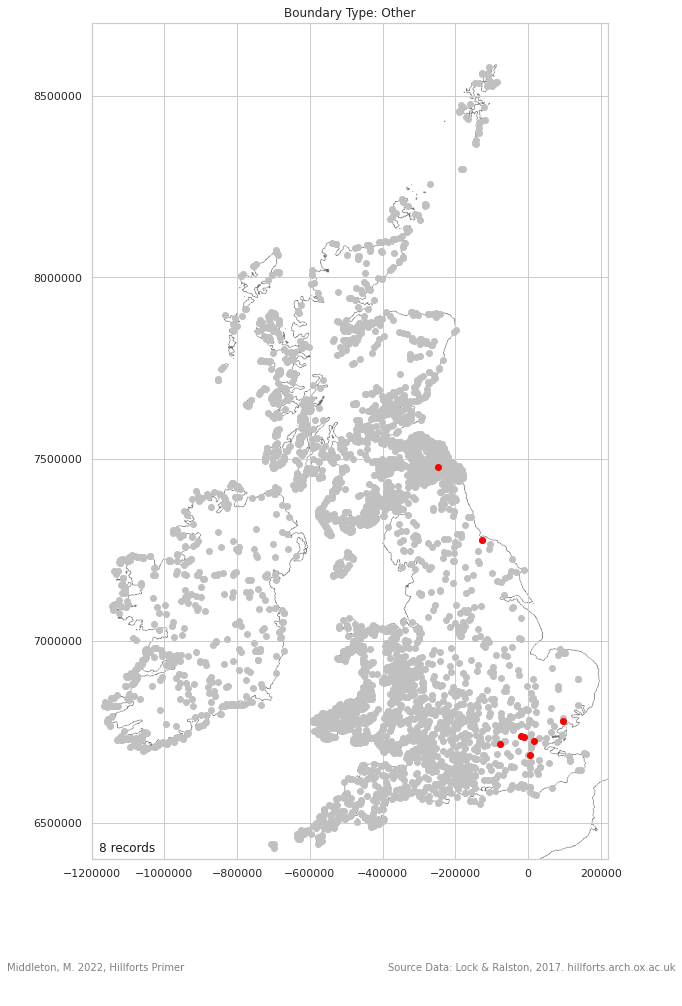

In [ ]:
plot_over_grey_boundary(location_boundary_data, 'Boundary_Boundary_Type', 'Other')

#### Boundary Country Code 2

Only seven records have been recorded against this category of boundary.

In [ ]:
boundary_encodeable_data['Boundary_Country_Code_2'].value_counts()

NA    4140
EN       4
WA       2
SC       1
Name: Boundary_Country_Code_2, dtype: int64

#### Boundary HER 2

Only 12 records have been recorded against this category of boundary.

In [ ]:
boundary_encodeable_data['Boundary_HER_2'].value_counts()

NA                       4135
Worcestershire              2
Shropshire                  2
Clwyd Powys                 2
West Berkshire              1
Dudley                      1
Hampshire                   1
Fife Council                1
East Sussex                 1
Wiltshire and Swindon       1
Name: Boundary_HER_2, dtype: int64

#### Boundary HER PRN 2

Only 10 records have been recorded against this category of boundary.

In [ ]:
boundary_encodeable_data['Boundary_HER_PRN_2'].value_counts()

NA          4137
WSM00932       2
MSA868         1
19259          1
MSA828         1
MWB3075        1
7097           1
3252           1
28636          1
MWI17466       1
Name: Boundary_HER_PRN_2, dtype: int64

#### Boundary Current County 2

Only 20 records have been recorded against this category of boundary.

In [ ]:
boundary_encodeable_data['Boundary_Current_County_2'].value_counts()

NA                        4127
Worcestershire               3
Shropshire                   2
Powys                        2
Wiltshire                    2
West Berkshire               1
West Midlands                1
Somerset                     1
Flintshire                   1
Denbighshire                 1
Hampshire                    1
Fife                         1
Hertfordshire                1
Windsor and Maidenhead       1
Cornwall                     1
East Sussex                  1
Name: Boundary_Current_County_2, dtype: int64

#### Boundary Historic County 2	

Only 17 records have been recorded against this category of boundary.

In [ ]:
boundary_encodeable_data['Boundary_Historic_County_2'].value_counts()

NA                  4130
Worcestershire         3
Shropshire             2
Denbighshire           2
Montgomeryshire        1
Hampshire              1
Berkshire              1
Mointgomeryshire       1
Staffordshire          1
Somerset               1
Fife                   1
Selkirkshire           1
Sussex                 1
Wiltshire              1
Name: Boundary_Historic_County_2, dtype: int64

#### Boundary Current Parish 2

Only 14 records have been recorded against this category of boundary.

In [ ]:
boundary_encodeable_data['Boundary_Current_Parish_2'].value_counts()[:5]

NA            3787
Branxton         4
Chatton          4
Doddington       3
Lowick           3
Name: Boundary_Current_Parish_2, dtype: int64

<a name ="bo_cp2"></a>
#### Boundary Current Parish 2 Mapped

This feature is very similar and suffers the same recording bias detailed in [Parish / Townland Boundary Mapped](#bo_parish).

In [ ]:
temp_boundary_data_plus = boundary_encodeable_data.copy()
temp_boundary_data_plus.where(temp_boundary_data_plus['Boundary_Current_Parish_2'] == 'NA', 'Yes', inplace=True)
temp_boundary_data_plus.head()

Boundary_Boundary_Type Boundary_Country_Code_2 Boundary_HER_2  \
0                     NA                      NA             NA   
1                     NA                      NA             NA   
2                     NA                      NA             NA   
3                     NA                      NA             NA   
4                    Yes                     Yes            Yes   

  Boundary_HER_PRN_2 Boundary_Current_County_2 Boundary_Historic_County_2  \
0                 NA                        NA                         NA   
1                 NA                        NA                         NA   
2                 NA                        NA                         NA   
3                 NA                        NA                         NA   
4                Yes                       Yes                        Yes   

  Boundary_Current_Parish_2  
0                        NA  
1                        NA  
2                        NA  
3                        NA  
4                       Yes

In [ ]:
temp_location_boundary_data = pd.merge(location_numeric_data_short, temp_boundary_data_plus, left_index=True, right_index=True)

Saving figure part03-008-boundary-current-parish-2.png


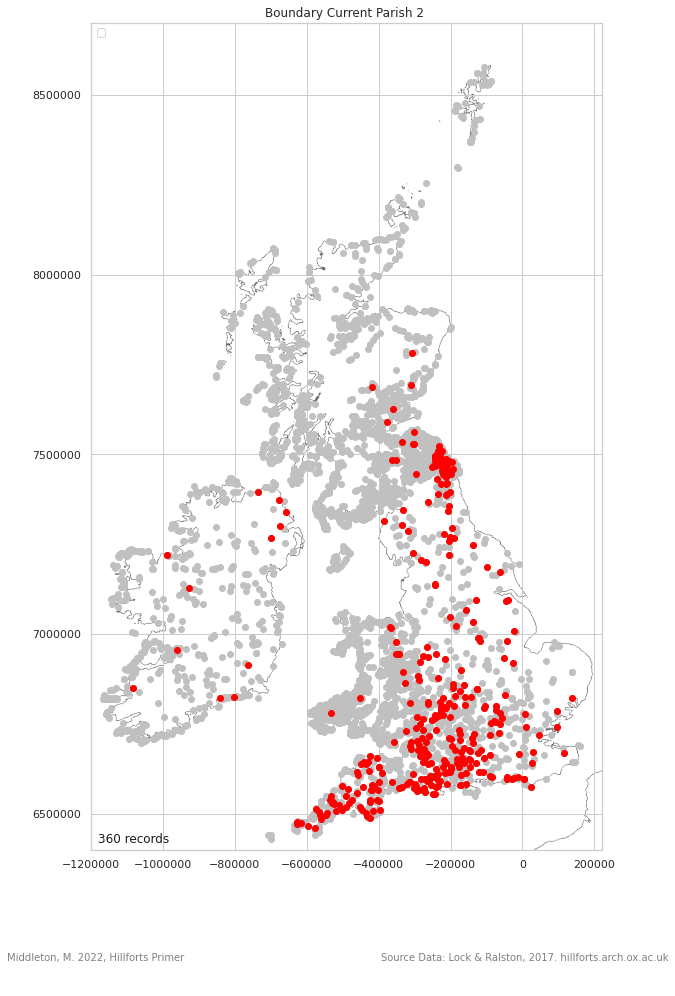

8.68%


In [ ]:
Boundary_Current_Parish_2_stats = plot_over_grey(temp_location_boundary_data, 'Boundary_Current_Parish_2', 'Yes') 

### Review Boundary Data Split

In [ ]:
review_data_split(boundary_data, boundary_numeric_data, boundary_text_data, boundary_encodeable_data)

Data split good.


### Drop Features From Boundary Encodeable Data

Only Boundary Type and Current Parish 2 will be retained. The remaining boundary features do not contain sufficient data.

In [ ]:
boundary_encodable_features_short = [
 'Boundary_Boundary_Type',
 'Boundary_Current_Parish_2']

In [ ]:
boundary_encodable_short = boundary_encodeable_data[boundary_encodable_features_short].copy()
boundary_encodable_short.head()

Boundary_Boundary_Type                          Boundary_Current_Parish_2
0                     NA                                                 NA
1                     NA                                                 NA
2                     NA                                                 NA
3                     NA                                                 NA
4                 County  Eastnor (Herefordshire); Little Malvern (Worce...

### Boundary Data Package

In [ ]:
boundary_data_list = [boundary_numeric_data, boundary_text_data, boundary_encodable_short]

### Boundary Data Download Package

If you do not wish to download the data using this document, all the processed data packages, notebooks and images are available here:<br> https://github.com/MikeDairsie/Hillforts-Primer.<br>

In [ ]:
download(boundary_data_list, 'Boundary_package')

## Dating Data

In [ ]:
dating_features = [
 'Dating_Date_Pre_1200BC',
 'Dating_Date_1200BC_800BC',
 'Dating_Date_800BC_400BC',
 'Dating_Date_400BC_AD50',
 'Dating_Date_AD50_AD400',
 'Dating_Date_AD400_AD800',
 'Dating_Date_Post_AD800',
 'Dating_Date_Unknown',
 'Dating_Date_Reliability',
 'Dating_Date_Comments',
 'Dating_Pre',
 'Dating_Pre_Comments',
 'Dating_Post',
 'Dating_Post_Comments',
 'Related_Dating_Evidence']

dating_data = hillforts_data[dating_features].copy()
dating_data.head()

Dating_Date_Pre_1200BC Dating_Date_1200BC_800BC Dating_Date_800BC_400BC  \
0                     No                       No                     Yes   
1                     No                       No                      No   
2                     No                       No                      No   
3                     No                       No                      No   
4                     No                       No                     Yes   

  Dating_Date_400BC_AD50 Dating_Date_AD50_AD400 Dating_Date_AD400_AD800  \
0                    Yes                    Yes                      No   
1                     No                     No                      No   
2                     No                     No                      No   
3                     No                    Yes                     Yes   
4                    Yes                    Yes                      No   

  Dating_Date_Post_AD800 Dating_Date_Unknown Dating_Date_Reliability  \
0                     No                  No                 C - Low   
1                     No                 Yes                D - None   
2                     No                 Yes                D - None   
3                     No                  No              B - Medium   
4                    Yes                  No                 C - Low   

                                Dating_Date_Comments Dating_Pre  \
0  The finding of Iron Age and Roman pottery sugg...         No   
1                                               None         No   
2  The chance finding of a number of cloudy blue ...         No   
3  Iron Age to Roman and possible later enclosure...        Yes   
4  The earlier enclosure of Phase I could be late...         No   

                                 Dating_Pre_Comments Dating_Post  \
0                                                NaN         Yes   
1                                                NaN          No   
2                                               None          No   
3  Possible Bronze Age ring ditch could indicate ...         Yes   
4  There is no evidence of pre-hillfort activity,...         Yes   

                                Dating_Post_Comments  \
0  Evidence of Civil War occupation and possible ...   
1                                                NaN   
2                                               None   
3      Possible later Roman or post-Roman enclosure.   
4    The ringwork is thought to be of medieval date.   

         Related_Dating_Evidence  
0                    Artefactual  
1                            NaN  
2                            NaN  
3                    Artefactual  
4  Morphology/Earthwork/Typology

All the period features and the 'pre' and 'post' features contain yes/no responses. These contain no null entries. Reliability and Related datating evidence contain controlled vocabularies and do contain null records. All the comments features are text and all contain empty records.

In [ ]:
dating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147 entries, 0 to 4146
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Dating_Date_Pre_1200BC    4147 non-null   object
 1   Dating_Date_1200BC_800BC  4147 non-null   object
 2   Dating_Date_800BC_400BC   4147 non-null   object
 3   Dating_Date_400BC_AD50    4147 non-null   object
 4   Dating_Date_AD50_AD400    4147 non-null   object
 5   Dating_Date_AD400_AD800   4147 non-null   object
 6   Dating_Date_Post_AD800    4147 non-null   object
 7   Dating_Date_Unknown       4147 non-null   object
 8   Dating_Date_Reliability   4134 non-null   object
 9   Dating_Date_Comments      4116 non-null   object
 10  Dating_Pre                4147 non-null   object
 11  Dating_Pre_Comments       448 non-null    object
 12  Dating_Post               4147 non-null   object
 13  Dating_Post_Comments      1961 non-null   object
 14  Related_Dating_Evidence 

### Dating Numeric Data

There is no numeric Dating Data.

In [ ]:
dating_numeric_data = pd.DataFrame()

### Dating Text Data

There are three Dating text features.

In [ ]:
dating_text_features = [
 'Dating_Date_Comments',
 'Dating_Pre_Comments',
 'Dating_Post_Comments']

dating_text_data = dating_data[dating_text_features].copy()
dating_text_data.head()

Dating_Date_Comments  \
0  The finding of Iron Age and Roman pottery sugg...   
1                                               None   
2  The chance finding of a number of cloudy blue ...   
3  Iron Age to Roman and possible later enclosure...   
4  The earlier enclosure of Phase I could be late...   

                                 Dating_Pre_Comments  \
0                                                NaN   
1                                                NaN   
2                                               None   
3  Possible Bronze Age ring ditch could indicate ...   
4  There is no evidence of pre-hillfort activity,...   

                                Dating_Post_Comments  
0  Evidence of Civil War occupation and possible ...  
1                                                NaN  
2                                               None  
3      Possible later Roman or post-Roman enclosure.  
4    The ringwork is thought to be of medieval date.

### Dating Text Data - Resolve Null Values

Test for 'NA'.

In [ ]:
test_cat_list_for_NA(dating_text_data, dating_text_features)

Dating_Date_Comments 0
Dating_Pre_Comments 0
Dating_Post_Comments 0


Fill null values with 'NA'.

In [ ]:
dating_text_data = update_cat_list_for_NA(dating_text_data, dating_text_features)
dating_text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147 entries, 0 to 4146
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Dating_Date_Comments  4147 non-null   object
 1   Dating_Pre_Comments   4147 non-null   object
 2   Dating_Post_Comments  4147 non-null   object
dtypes: object(3)
memory usage: 97.3+ KB


### Dating Encodeable Data

In [ ]:
dating_encodeable_features = [
 'Dating_Date_Pre_1200BC',
 'Dating_Date_1200BC_800BC',
 'Dating_Date_800BC_400BC',
 'Dating_Date_400BC_AD50',
 'Dating_Date_AD50_AD400',
 'Dating_Date_AD400_AD800',
 'Dating_Date_Post_AD800',
 'Dating_Date_Unknown',
 'Dating_Date_Reliability',
 'Dating_Pre',
 'Dating_Post',
 'Related_Dating_Evidence']

dating_encodeable_data = dating_data[dating_encodeable_features].copy()
dating_encodeable_data.head()

Dating_Date_Pre_1200BC Dating_Date_1200BC_800BC Dating_Date_800BC_400BC  \
0                     No                       No                     Yes   
1                     No                       No                      No   
2                     No                       No                      No   
3                     No                       No                      No   
4                     No                       No                     Yes   

  Dating_Date_400BC_AD50 Dating_Date_AD50_AD400 Dating_Date_AD400_AD800  \
0                    Yes                    Yes                      No   
1                     No                     No                      No   
2                     No                     No                      No   
3                     No                    Yes                     Yes   
4                    Yes                    Yes                      No   

  Dating_Date_Post_AD800 Dating_Date_Unknown Dating_Date_Reliability  \
0                     No                  No                 C - Low   
1                     No                 Yes                D - None   
2                     No                 Yes                D - None   
3                     No                  No              B - Medium   
4                    Yes                  No                 C - Low   

  Dating_Pre Dating_Post        Related_Dating_Evidence  
0         No         Yes                    Artefactual  
1         No          No                            NaN  
2         No          No                            NaN  
3        Yes         Yes                    Artefactual  
4         No         Yes  Morphology/Earthwork/Typology

### Review Dating Data Split

In [ ]:
review_data_split(dating_data, dating_numeric_data, dating_text_data, dating_encodeable_data)

Data split good.


#### Period Data

The majority of hillforts have no date infromation. The maps below show the data contains a recording bias in that the majority of dating information comes from southern England. There is very little dating information outside this area. 

In [ ]:
date_features = [
 'Dating_Date_Pre_1200BC',
 'Dating_Date_1200BC_800BC',
 'Dating_Date_800BC_400BC',
 'Dating_Date_400BC_AD50',
 'Dating_Date_AD50_AD400',
 'Dating_Date_AD400_AD800',
 'Dating_Date_Post_AD800',
 'Dating_Date_Unknown']

date_data = dating_encodeable_data[date_features]
date_data.head()

Dating_Date_Pre_1200BC Dating_Date_1200BC_800BC Dating_Date_800BC_400BC  \
0                     No                       No                     Yes   
1                     No                       No                      No   
2                     No                       No                      No   
3                     No                       No                      No   
4                     No                       No                     Yes   

  Dating_Date_400BC_AD50 Dating_Date_AD50_AD400 Dating_Date_AD400_AD800  \
0                    Yes                    Yes                      No   
1                     No                     No                      No   
2                     No                     No                      No   
3                     No                    Yes                     Yes   
4                    Yes                    Yes                      No   

  Dating_Date_Post_AD800 Dating_Date_Unknown  
0                     No                  No  
1                     No                 Yes  
2                     No                 Yes  
3                     No                  No  
4                    Yes                  No

#### Period Data Plotted

The majority of hillforts are undated.

Saving figure part03-009-dating.png


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if sys.path[0] == '':


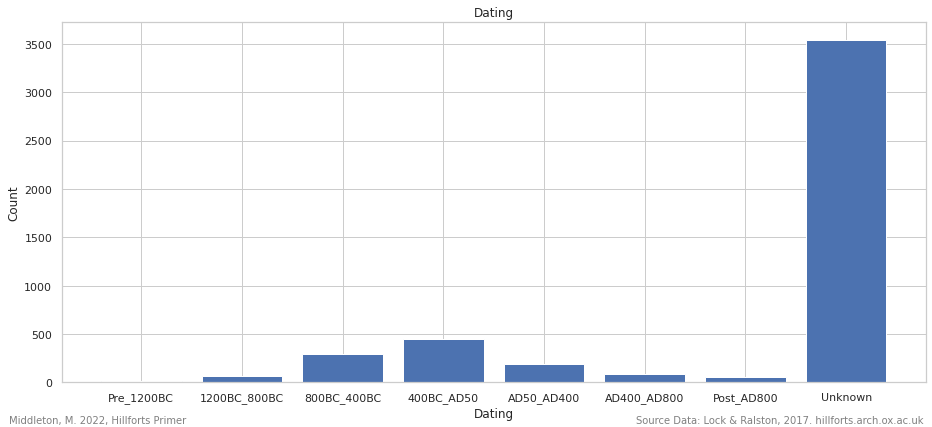

In [ ]:
plot_bar_chart(date_data, 2, 'Dating', 'Count', 'Dating')

#### Date Data (Excluding No Dates) Plotted

For the relativly few hillforts that have dating evidence, the majority are dated to the Iron Age (800BC to AD50) with the largest cluster being the late Iron Age (400BC to AD50). There are relativly few pre Iron Age dates. In contrast, there are a number early medieval dates (AD50 to AD800) with most falling at the lower end between AD50 and AD400. 

In [ ]:
date_features_minus = [
 'Dating_Date_Pre_1200BC',
 'Dating_Date_1200BC_800BC',
 'Dating_Date_800BC_400BC',
 'Dating_Date_400BC_AD50',
 'Dating_Date_AD50_AD400',
 'Dating_Date_AD400_AD800',
 'Dating_Date_Post_AD800']

date_data_minus = hillforts_data[date_features_minus]
date_data_minus.head()

Dating_Date_Pre_1200BC Dating_Date_1200BC_800BC Dating_Date_800BC_400BC  \
0                     No                       No                     Yes   
1                     No                       No                      No   
2                     No                       No                      No   
3                     No                       No                      No   
4                     No                       No                     Yes   

  Dating_Date_400BC_AD50 Dating_Date_AD50_AD400 Dating_Date_AD400_AD800  \
0                    Yes                    Yes                      No   
1                     No                     No                      No   
2                     No                     No                      No   
3                     No                    Yes                     Yes   
4                    Yes                    Yes                      No   

  Dating_Date_Post_AD800  
0                     No  
1                     No  
2                     No  
3                     No  
4                    Yes

Saving figure part03-010-dating-dated-only.png


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if sys.path[0] == '':


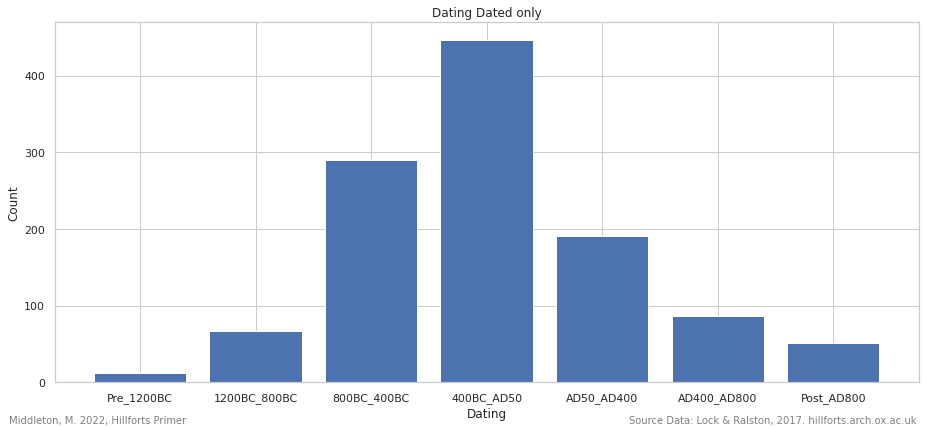

In [ ]:
plot_bar_chart(date_data_minus, 2, 'Dating', 'Count', 'Dating_Dated_only')

#### Period Data Mapped

In [ ]:
location_date_data = pd.merge(location_numeric_data_short, date_data, left_index=True, right_index=True)

##### Pre 1200 BC Mapped

There are only 12 hillforts which have produced dates pre 1200BC. A density plot has not been produced as there is insufficient data.

Saving figure part03-011-dating-date-pre-1200bc.png


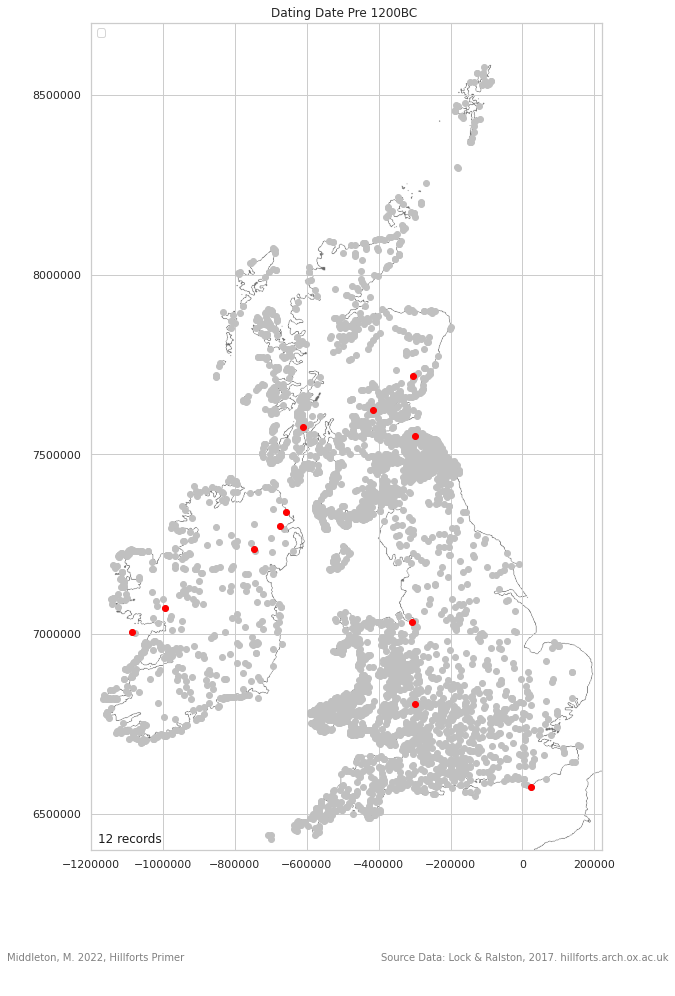

0.29%


In [ ]:
dt_1200 = plot_over_grey(location_date_data, 'Dating_Date_Pre_1200BC', 'Yes') 

##### 1200BC - 800BC Mapped

Only 67 hillforts have a date between 1200 BC and 800 BC. A density plot has not been produced as there is insufficient data.

Saving figure part03-012-dating-date-1200bc-800bc.png


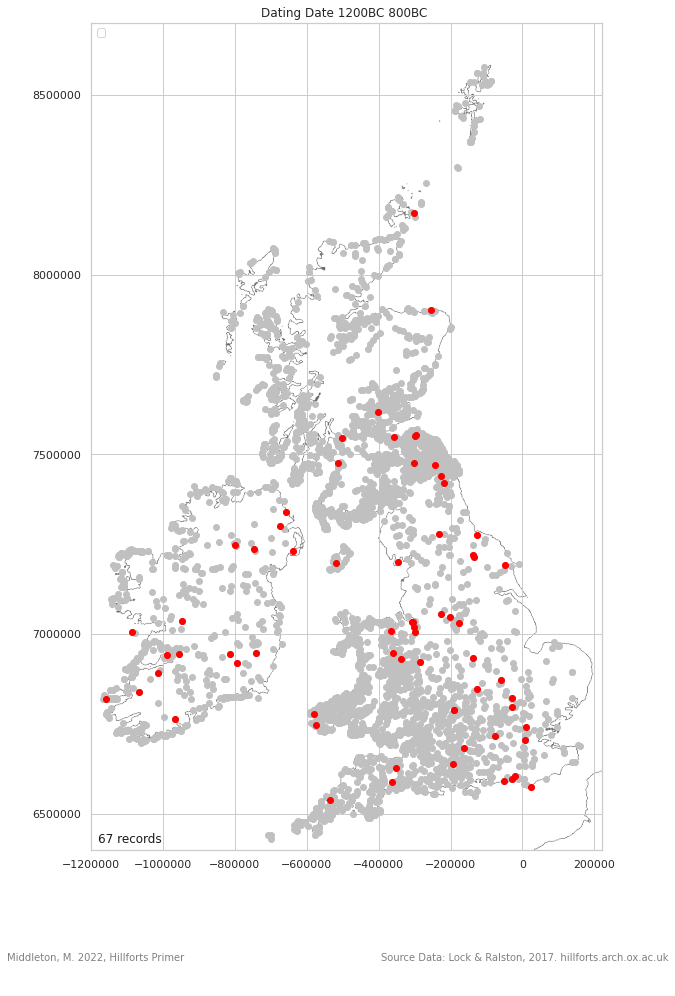

1.62%


In [ ]:
dt_1200_800 = plot_over_grey(location_date_data, 'Dating_Date_1200BC_800BC', 'Yes') 

##### 800BC - 400BC Mapped

Hillfots dated 800 BC to 400 BC are located predominatly in south central England. There is a clear bias in this distribution with there being only a single fort in Ireland and very few in Scoland, Wales and south-west England. 

Saving figure part03-013-dating-date-800bc-400bc.png


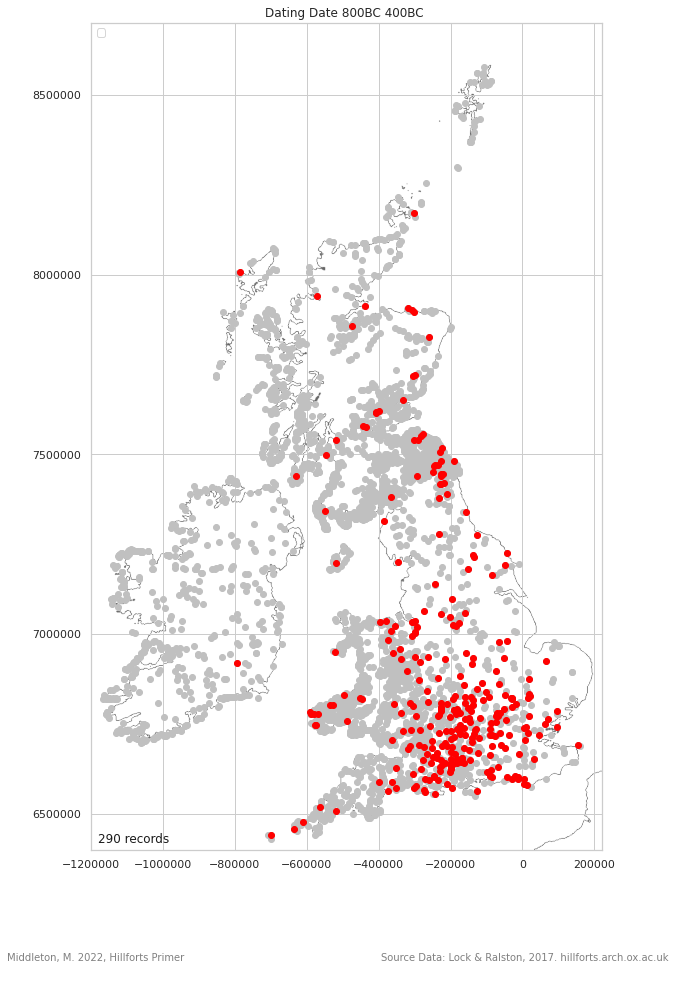

6.99%


In [ ]:
dt_800_400 = plot_over_grey(location_date_data, 'Dating_Date_800BC_400BC', 'Yes') 

##### 800BC - 400BC Density Mapped

Although the density for this distribtion has been produced, it looks to be a highly missleading custer due to a recording bias.

Saving figure part03-014-density-dating-date-800bc-400bc.png


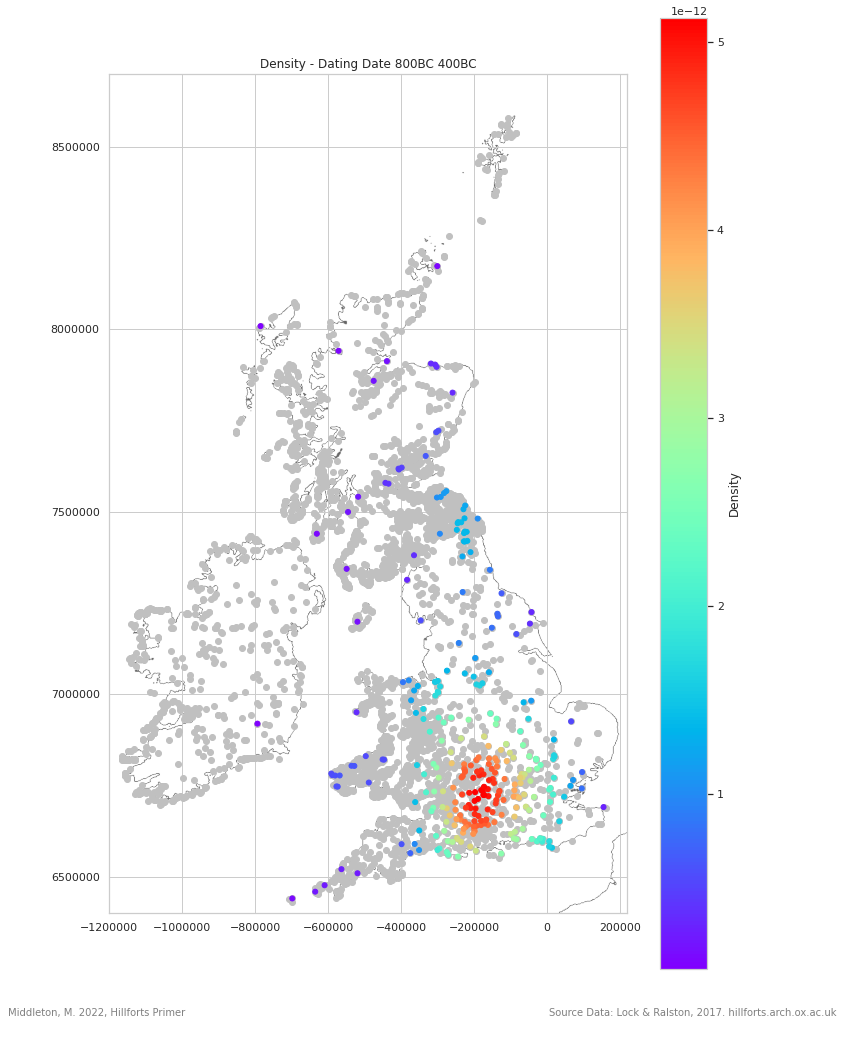

In [ ]:
plot_density_over_grey(dt_800_400, 'Dating_Date_800BC_400BC')

##### 800BC - 400BC Mapped Plus Oxford and Swindon Orbits

Plotting the orbits of Oxford Universiy and the head office of Historic England, there is an almost exact corrilation between the overlaps of these two orbits and the most dense concentration of records in this cluster. This suggests the distribution is more likely to be the result of concentrated sampling in this area rather than being a meaningful distribution relating to this period. What the cluster does show is that, in this concentrated area, many hillforts have dates in this range.

Saving figure part03-015-dating-date-800bc-400bc.png


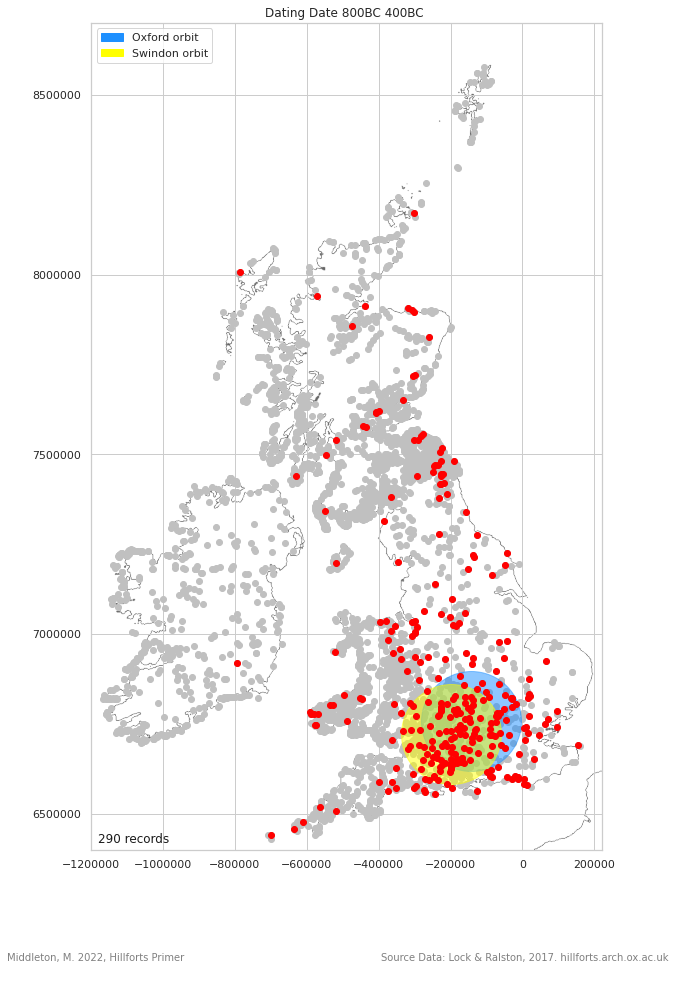

6.99%


In [ ]:
date_800bc_400bc = plot_over_grey(location_date_data, 'Dating_Date_800BC_400BC', 'Yes','', False, False, True, True) 

##### 400BC - AD50 Mapped

The reccording bias seen in 800 BC to 400 BC is again visable in this cluster and similar voids in the record can be seen acroos the rest of the atlas.

Saving figure part03-016-dating-date-400bc-ad50.png


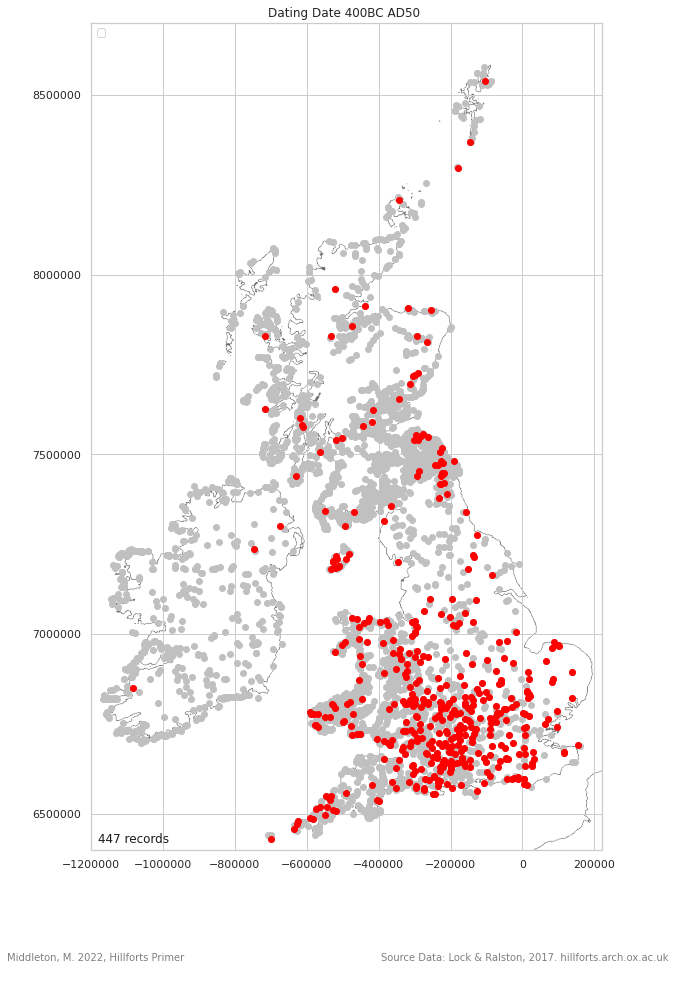

10.78%


In [ ]:
dt_400_50 = plot_over_grey(location_date_data, 'Dating_Date_400BC_AD50', 'Yes') 

##### 400BC - AD50 Density Mapped

The cluster focus is identical to that seen in 800 BC to 400 BC.

Saving figure part03-017-density-dating-date-400bc-ad50.png


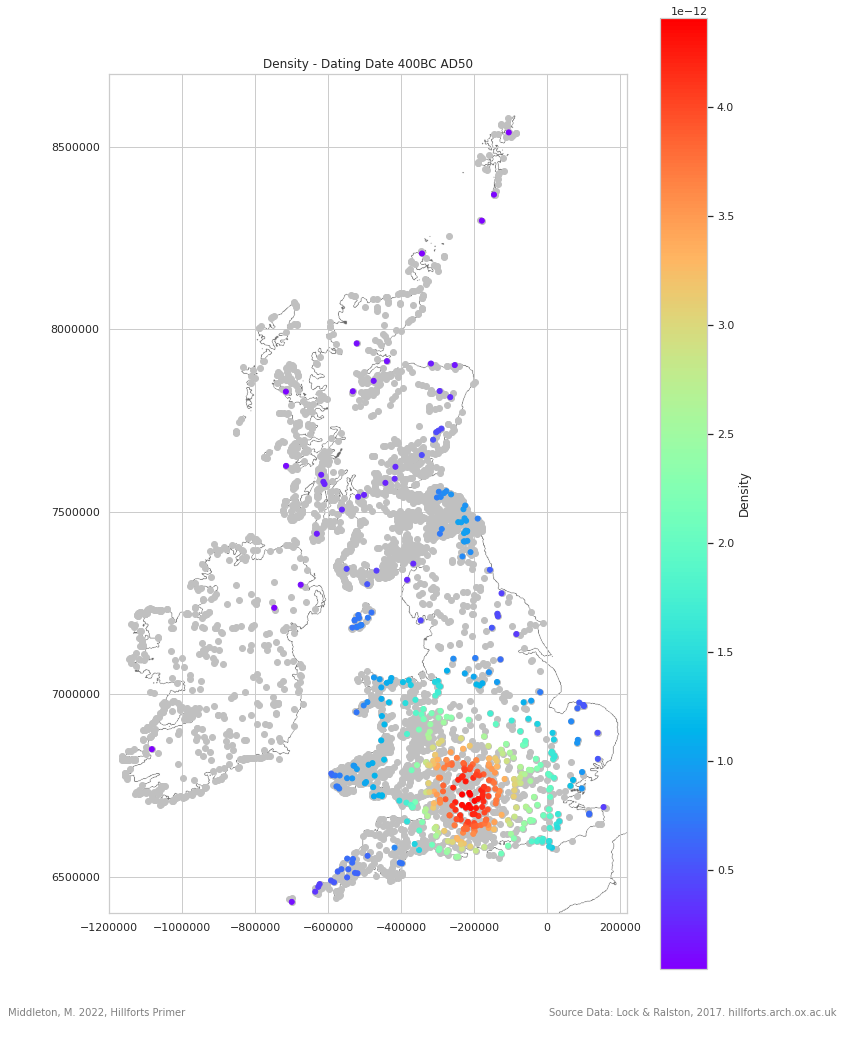

In [ ]:
plot_density_over_grey(dt_400_50, 'Dating_Date_400BC_AD50')

<a name="400bc-ad50"></a>
##### 400BC - AD50 Mapped Plus Oxford and Swindon Orbits

The cluster focus is again a result of intensive recording within the orbits of Oxford Universit and Historic England. Within this area it can be said that for forts with dates, hillforts with a 400 BC to AD 50 date are the most common.

Saving figure part03-018-dating-date-400bc-ad50.png


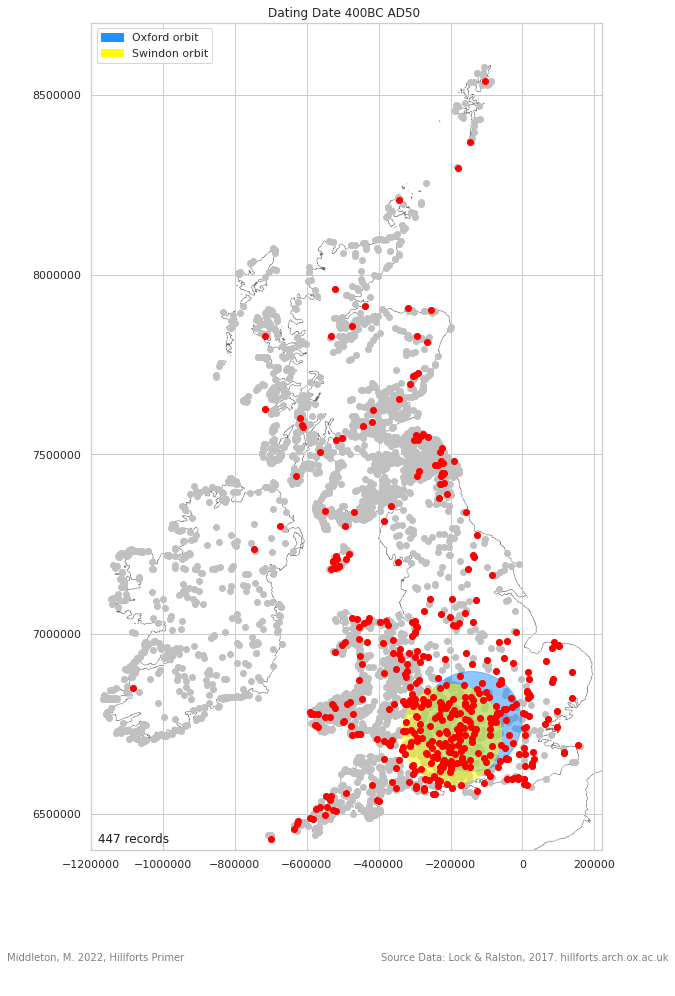

10.78%


In [ ]:
date_400bc_50ad = plot_over_grey(location_date_data, 'Dating_Date_400BC_AD50', 'Yes', '', False, False, True, True) 

##### AD50 - AD400 Mapped

The distribution of forts in the AD 50 to AD 400 range will also be bieased decause of the recording focus mentioned above. It is noteable that there are no records recorded for this period in Ireland. Because of the bias in the dataing records mentioned in 
[400BC - AD50 Mapped Plus Oxford and Swindon Orbits](#400bc-ad50), a distribution plot for this period has not been produced.

Saving figure part03-019-dating-date-ad50-ad400.png


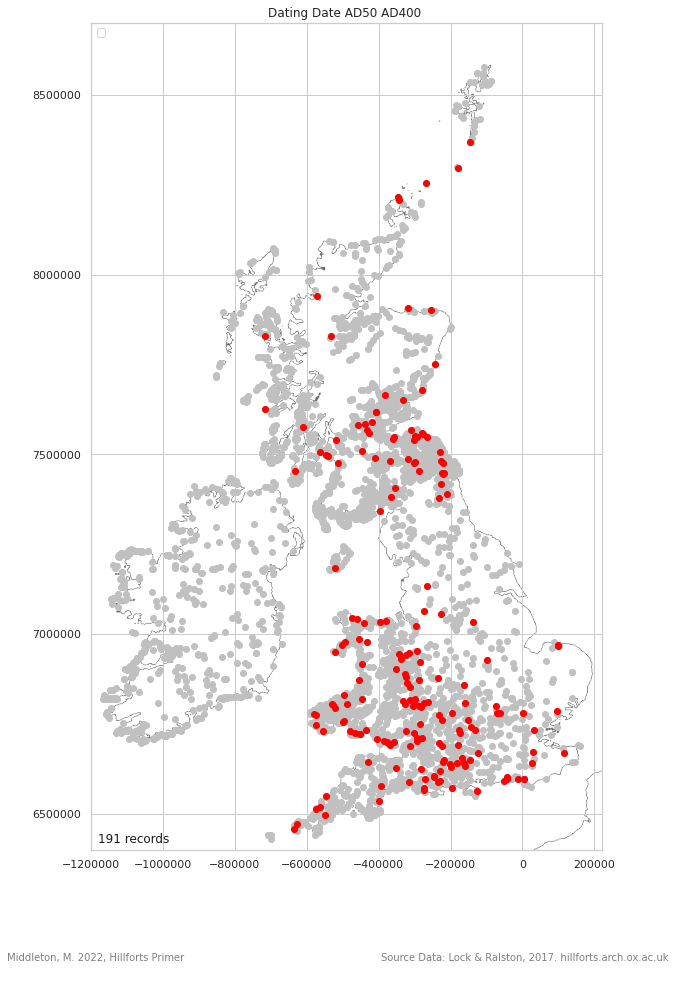

4.61%


In [ ]:
dt_50_400 = plot_over_grey(location_date_data, 'Dating_Date_AD50_AD400', 'Yes') 

##### AD400 - AD800 Mapped

A small number of hillforts have dates in the AD 400 to AD 800 rage. Interestingly most of these are outside the bias seen in the dating focus mentioned in 
[400BC - AD50 Mapped Plus Oxford and Swindon Orbits](#400bc-ad50). This may be an observation that is meaningful for the south of England. 

Saving figure part03-020-dating-date-ad400-ad800.png


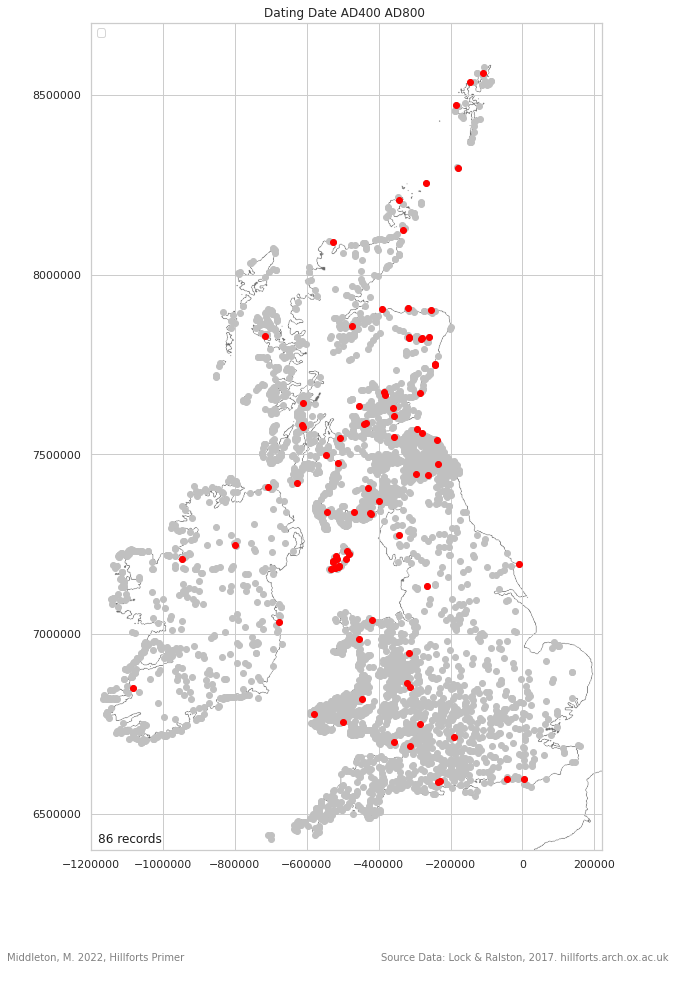

2.07%


In [ ]:
dt_400_800 = plot_over_grey(location_date_data, 'Dating_Date_AD400_AD800', 'Yes') 

##### Post AD800 Mapped

A small number of hillforts have dates post AD 800. Again, most are outside the bias seen in the dating focus mentioned in 
[400BC - AD50 Mapped Plus Oxford and Swindon Orbits](#400bc-ad50). This may be an observation that is meaningful for the south of England. 

Saving figure part03-021-dating-date-post-ad800.png


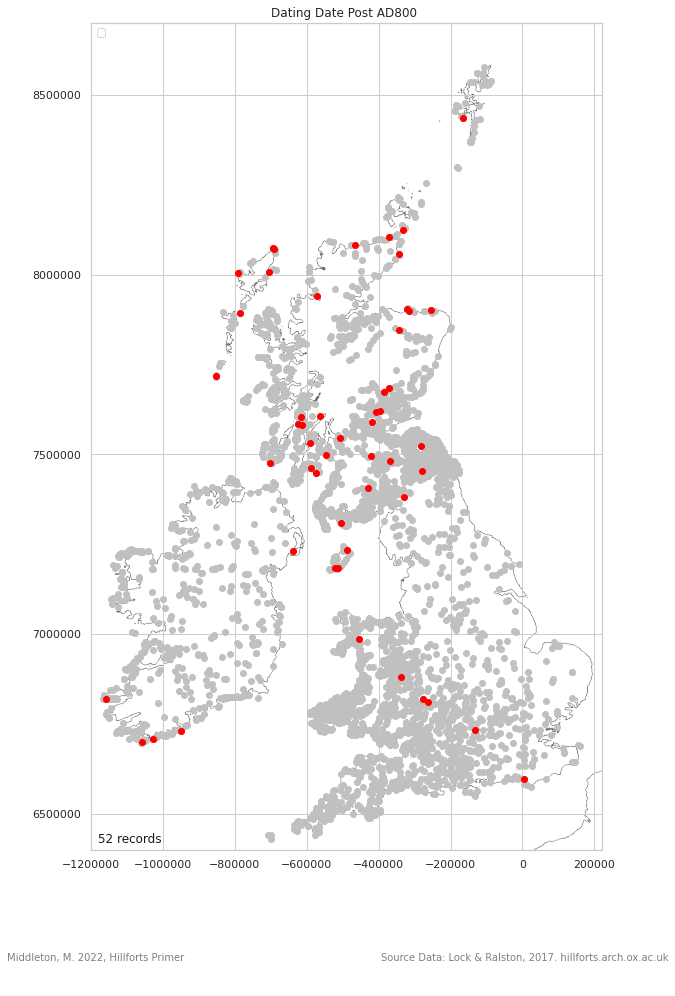

1.25%


In [ ]:
dt_800 = plot_over_grey(location_date_data, 'Dating_Date_Post_AD800', 'Yes') 

##### Date Known Mapped

Only 14.5% of hillofrts have dating information and the majority of these are in the south of England.

Saving figure part03-022-dating-date-unknown-no-known.png


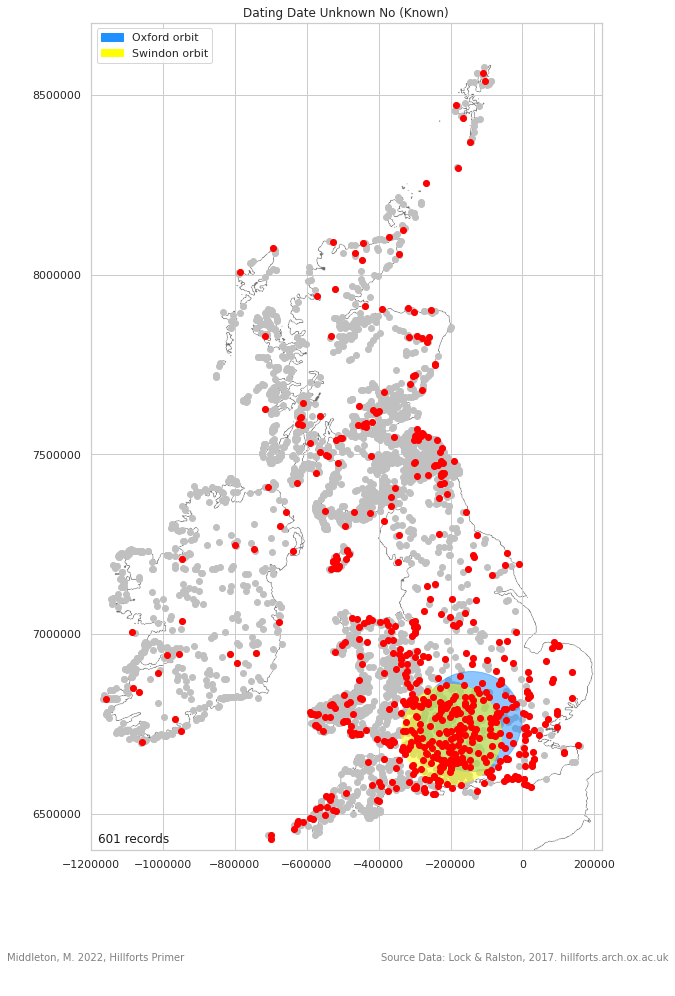

14.49%


In [ ]:
dt_known = plot_over_grey(location_date_data, 'Dating_Date_Unknown', 'No', 'No (Known)', False, False, True, True) 

##### Date Unknown Mapped

Most (85.5%) of hillforts have no dating evidence.

Saving figure part03-023-dating-date-unknown.png


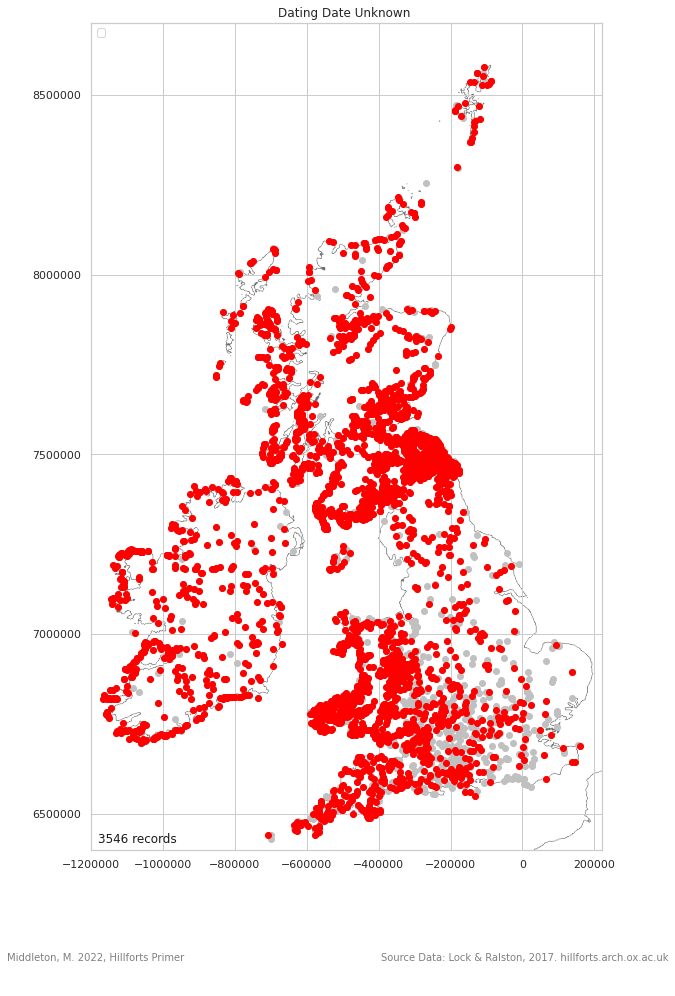

85.51%


In [ ]:
dt_unknown = plot_over_grey(location_date_data, 'Dating_Date_Unknown', 'Yes') 

### Dating Encodeable Data - Resolve Null Values

There are two features containing null values

In [ ]:
dating_encodeable_data[['Dating_Date_Reliability','Related_Dating_Evidence']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147 entries, 0 to 4146
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Dating_Date_Reliability  4134 non-null   object
 1   Related_Dating_Evidence  805 non-null    object
dtypes: object(2)
memory usage: 64.9+ KB


Test for 'NA'.

In [ ]:
test_cat_list_for_NA(dating_encodeable_data, ['Dating_Date_Reliability','Related_Dating_Evidence'])

Dating_Date_Reliability 0
Related_Dating_Evidence 0


Update null values to 'NA'.

In [ ]:
dating_encodeable_data = update_cat_list_for_NA(dating_encodeable_data, ['Dating_Date_Reliability','Related_Dating_Evidence'])

In [ ]:
dating_encodeable_data_review = test_numeric(dating_encodeable_data[['Dating_Date_Reliability','Related_Dating_Evidence']])
dating_encodeable_data_review

Feature  Entries  Numeric  Non-Numeric  Null
0  Dating_Date_Reliability     4147        0         4147     0
1  Related_Dating_Evidence     4147        0         4147     0

#### Date Reliability

Data reliability contains five values.

In [ ]:
pd.unique(dating_encodeable_data['Dating_Date_Reliability'])

array(['C - Low', 'D - None', 'B - Medium', 'A - High', 'NA'],
      dtype=object)

The majority of hillforts have no dataing reliability recorded as most hillforts do not have dating evidence. Of those that do have dating evidence, only 62 have dates that are classified as highly reliable.

Saving figure part03-024-date-reliability.png


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if sys.path[0] == '':


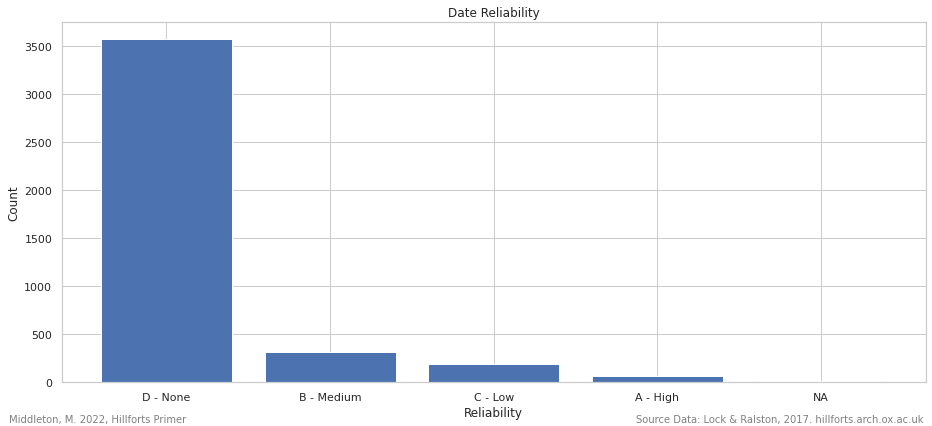

In [ ]:
plot_bar_chart_value_counts(dating_encodeable_data['Dating_Date_Reliability'], 'Reliability', 'Count', 'Date_Reliability')

#### Date Reliability Mapped (D - None)

Most hillforts have no reliable dating evidence. 

In [ ]:
location_dating_encodeable_data = pd.merge(location_numeric_data_short, dating_encodeable_data, left_index=True, right_index=True)

Saving figure part03-025-dating-date-reliability-d-none.png


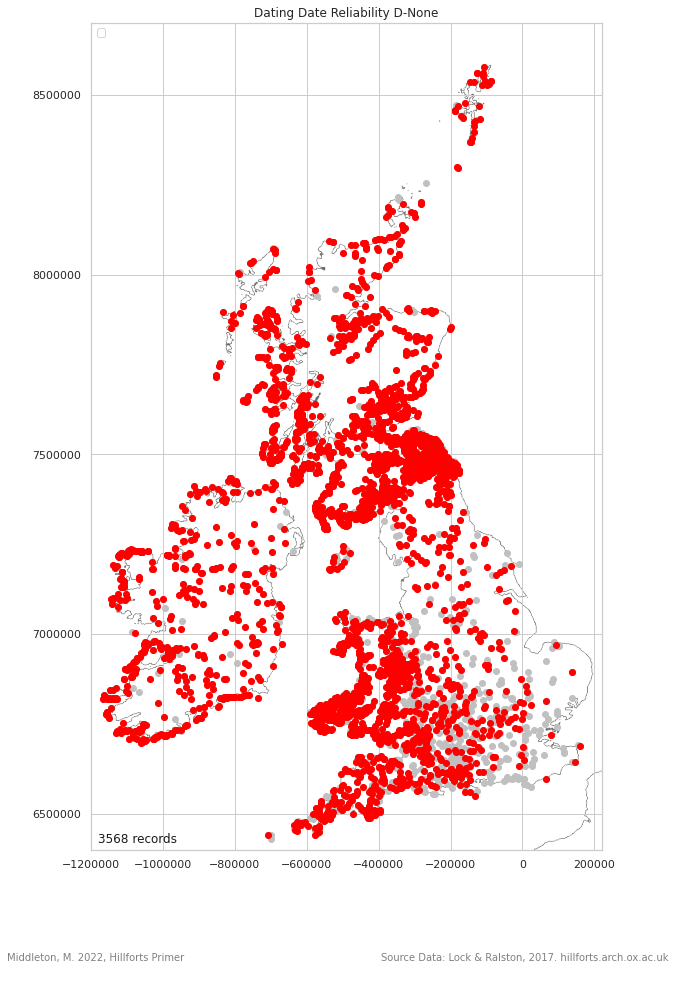

In [ ]:
dating_reliability_none = location_dating_encodeable_data[location_dating_encodeable_data['Dating_Date_Reliability']=='D - None'].copy()
plot_over_grey_numeric(dating_reliability_none, 'Dating_Date_Reliability', 'Dating_Date_Reliability_D-None')

#### Date Reliability Mapped (C - Low)

Of the hillforts that have dataing evidence, only a relativly few have dating that is classified as low reliability. It should be noted that the distibutions based on dating reliability suffer from the same recording bias discussed in in 
[400BC - AD50 Mapped Plus Oxford and Swindon Orbits](#400bc-ad50).

Saving figure part03-026-dating-date-reliability-c-low.png


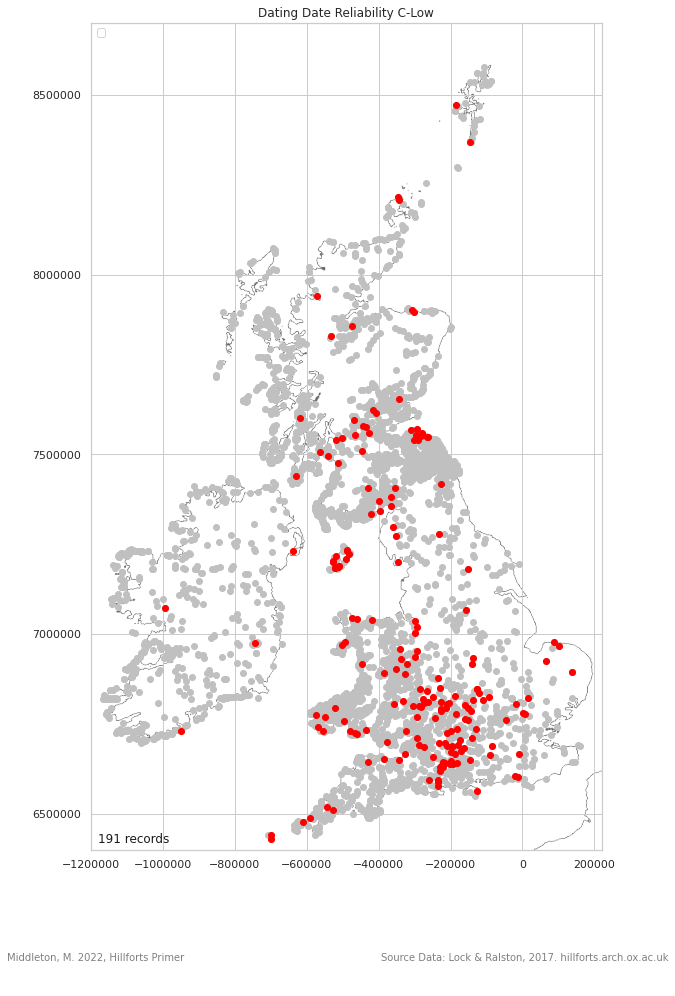

In [ ]:
dating_reliability_low = location_dating_encodeable_data[location_dating_encodeable_data['Dating_Date_Reliability']=='C - Low'].copy()
plot_over_grey_numeric(dating_reliability_low, 'Dating_Date_Reliability', 'Dating_Date_Reliability_C-Low')

#### Date Reliability Mapped (B - Medium)

Saving figure part03-027-dating-date-reliability-b-medium.png


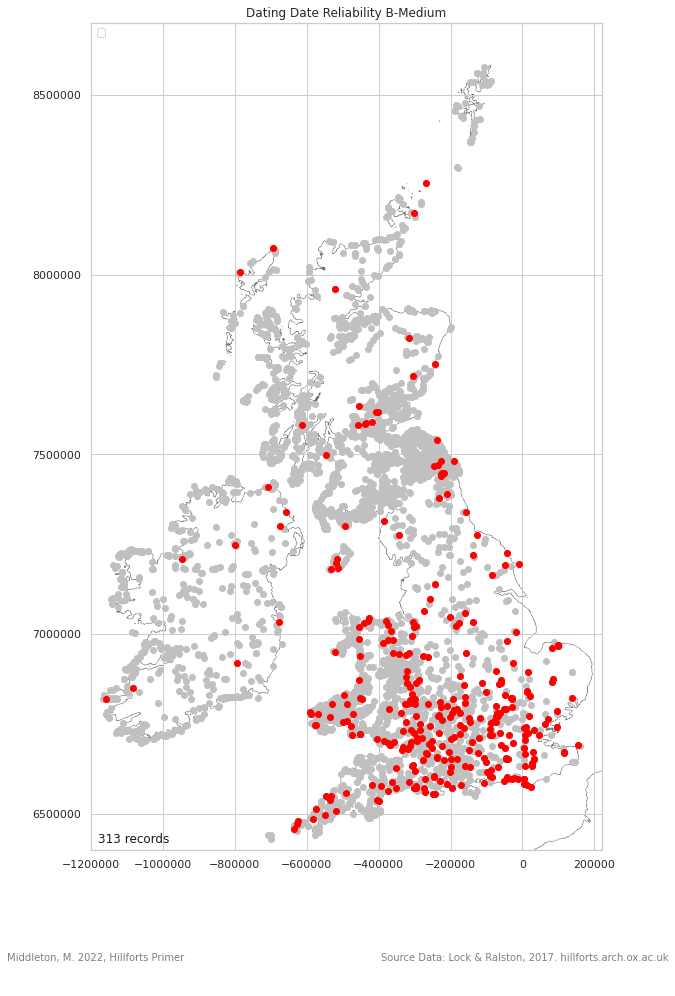

In [ ]:
dating_reliability_med = location_dating_encodeable_data[location_dating_encodeable_data['Dating_Date_Reliability']=='B - Medium'].copy()
plot_over_grey_numeric(dating_reliability_med, 'Dating_Date_Reliability', 'Dating_Date_Reliability_B-Medium')

#### Date Reliability Mapped (A - High)

Saving figure part03-028-dating-date-reliability-a-high.png


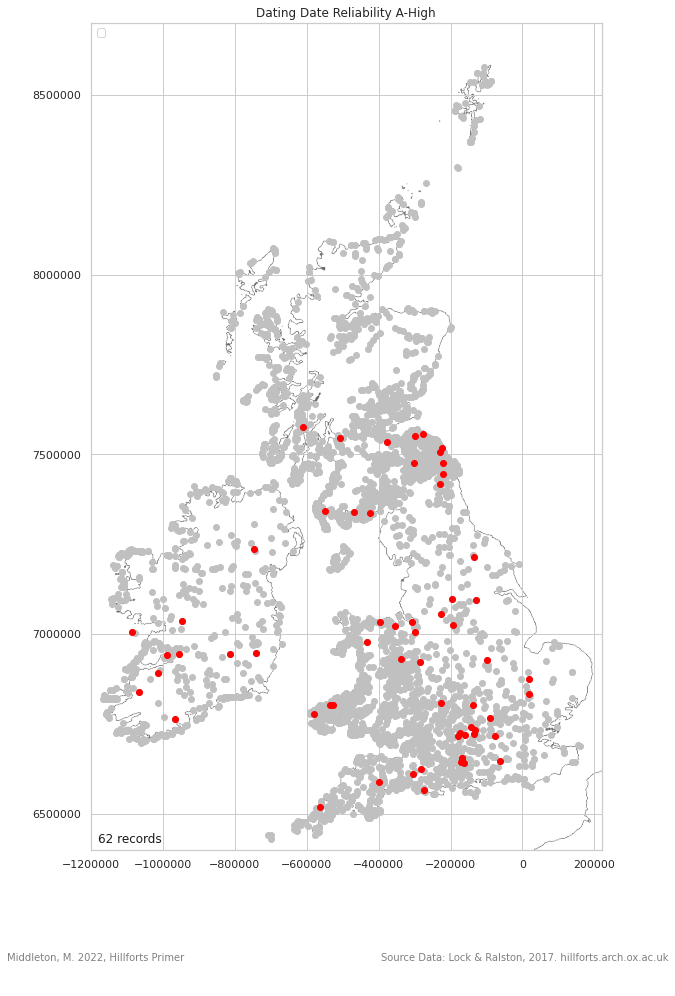

In [ ]:
dating_reliability_high = location_dating_encodeable_data[location_dating_encodeable_data['Dating_Date_Reliability']=='A - High'].copy()
plot_over_grey_numeric(dating_reliability_high, 'Dating_Date_Reliability', 'Dating_Date_Reliability_A-High')

#### Date Reliability Mapped (NA)

Thirteen records have no information recorded for date reliability.

Saving figure part03-029-dating-date-reliability-na.png


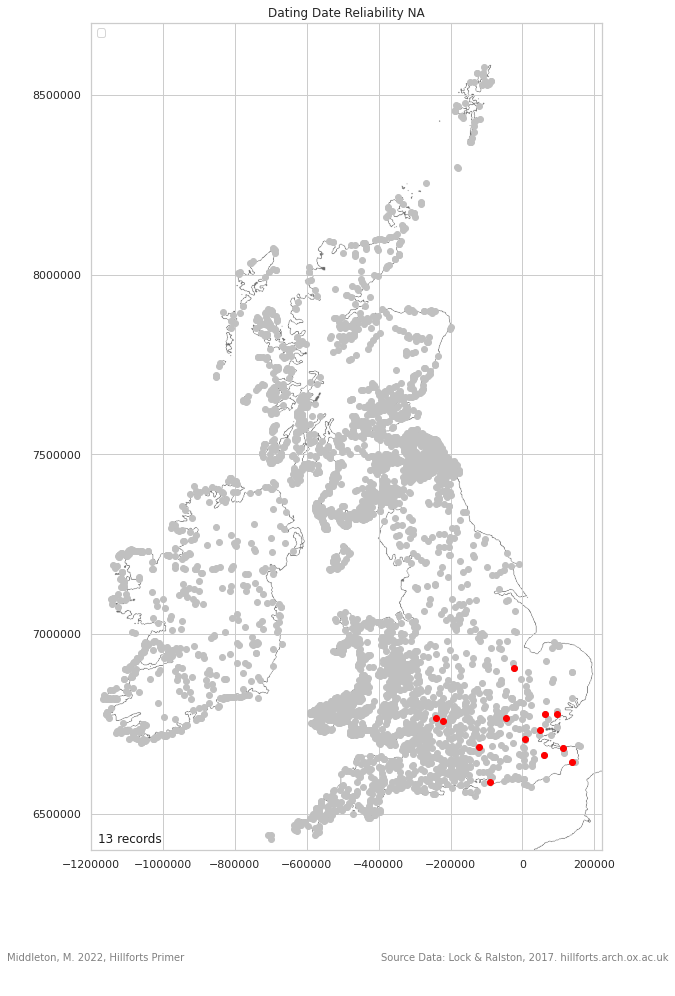

In [ ]:
dating_reliability_na = location_dating_encodeable_data[location_dating_encodeable_data['Dating_Date_Reliability']=='NA'].copy()
plot_over_grey_numeric(dating_reliability_na, 'Dating_Date_Reliability', 'Dating_Date_Reliability_NA')

#### Simplify Date Reliablity

When this data is encoded the current values will be added as feature/ column headings. The current format of the data, with spaces and hypen, could lead to problems so it is simplified.

In [ ]:
dating_encodeable_data['Dating_Date_Reliability'] = np.where(dating_encodeable_data['Dating_Date_Reliability'] != 'NA', dating_encodeable_data['Dating_Date_Reliability'].astype(str).str[0], dating_encodeable_data['Dating_Date_Reliability'])
pd.unique(dating_encodeable_data['Dating_Date_Reliability'])

array(['C', 'D', 'B', 'A', 'NA'], dtype=object)

#### Dating Pre

This feature records if there is activity on site prior to the construction of the hillfort.

Saving figure part03-030-dating-pre-dating-pre.png


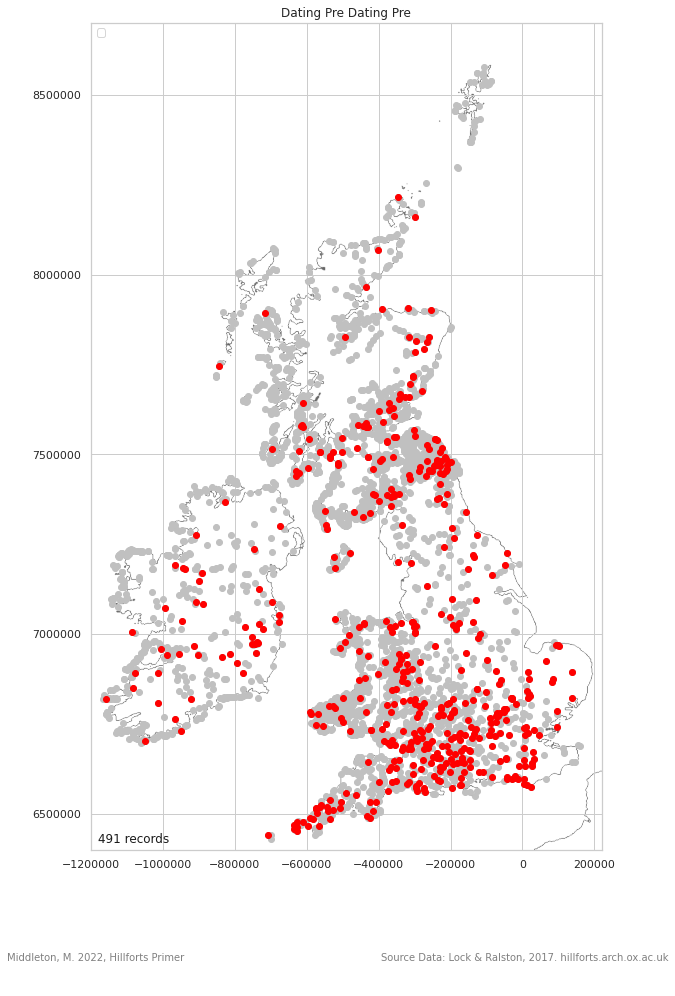

11.84%


In [ ]:
dating_pre_stats = plot_over_grey(location_dating_encodeable_data, 'Dating_Pre', 'Yes', 'Dating_Pre') 

#### Dating Post

This feature records if there is activity on site post the abandon of the hillfort.

Saving figure part03-031-dating-post-dating-post.png


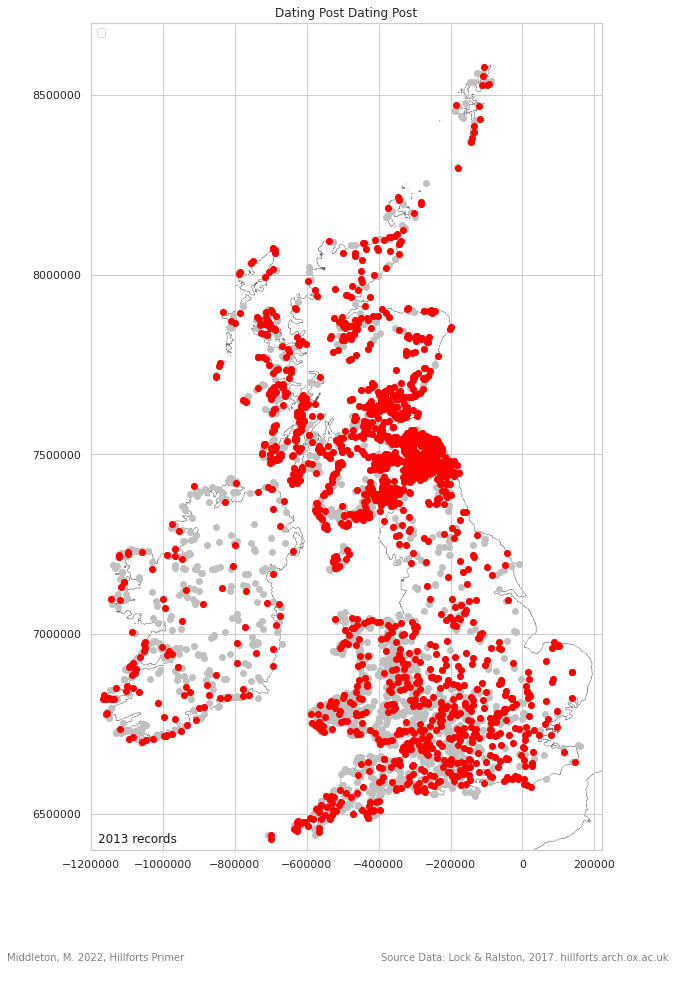

48.54%


In [ ]:
dating_post_stats = plot_over_grey(location_dating_encodeable_data, 'Dating_Post', 'Yes', 'Dating_Post') 

#### Dating by Region

Only the south has sufficient data to produce a meningful chart. The southern data shows peak between 400 BC and AD 50 with high concentrations of datable material on these sites running from 800 BC to AD 400. The dataing in this reagion is peodomenently derived from artifactul analysis. [See: Map Related Dating Artefactual](#dating_artefactual).

The North-east and North-west show a similar distribution of dates but differ in that they show signs of continured use beyond AD 800. Caution is needed in that this distribution of dates is based on a relativly small dataset.

The Irish data is quite differnt. There is a large peak from 1200 BC and 800 BC with the North of Ireland having a similarly large peak for dates pre 1200BC. There are almost no dates in the North of Ireland between 800 BC and 400 BC and only a small peak in South Ireland. There are very few dates in North or South Ireland between AD 50and AD 400 and then increased activity, in terms of dating, from AD 400 on to post AD 800. There are very few dates for hillforts in Ierland. It is highly likely the distridution of dates just discussed could change readically as more dates become available. Extream caution is needed when interpreting the distirbution and spread of Irish dates.


In [ ]:
location_enclosing_data_nw_dates = pd.merge(north_west, date_data, left_index=True, right_index=True)
location_enclosing_data_ne_dates = pd.merge(north_east, date_data, left_index=True, right_index=True)
location_enclosing_data_ireland_n_dates = pd.merge(north_ireland, date_data, left_index=True, right_index=True)
location_enclosing_data_ireland_s_dates = pd.merge(south_ireland, date_data, left_index=True, right_index=True)
location_enclosing_data_south_dates = pd.merge(south, date_data, left_index=True, right_index=True)

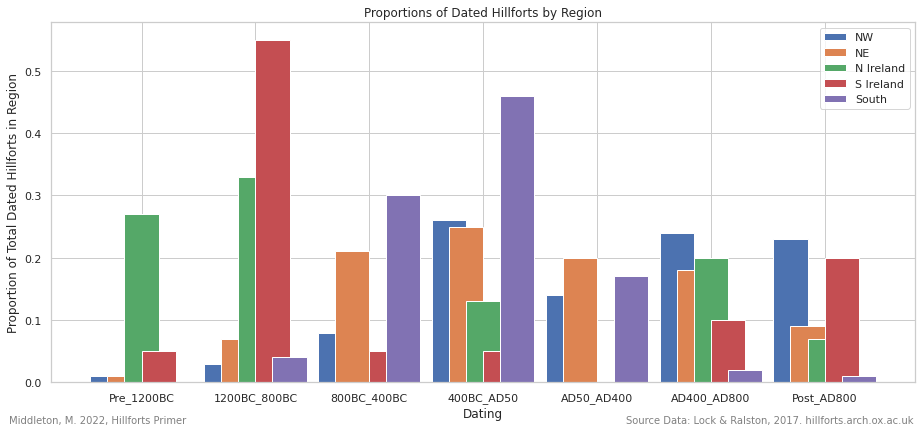

In [ ]:
plot_dates_by_region(location_enclosing_data_nw_dates,location_enclosing_data_ne_dates,location_enclosing_data_ireland_n_dates,location_enclosing_data_ireland_s_dates,location_enclosing_data_south_dates, date_features)

### Related Dating Evidence

In [ ]:
list(pd.unique(dating_encodeable_data['Related_Dating_Evidence']))

['Artefactual',
 'NA',
 'Morphology/Earthwork/Typology',
 'Artefactual; C14; Morphology/Earthwork/Typology',
 'Artefactual; C14',
 'C14',
 'Artefactual; Morphology/Earthwork/Typology',
 'Morphology/Earthwork/Typology; Other',
 'C14; Morphology/Earthwork/Typology',
 'Other',
 'Artefactual; Other',
 'Artefactual; C14; Other',
 'C14; Morphology/Earthwork/Typology; Other',
 'C14; Other',
 'Artefactual; C14; Artefactual; C14',
 'Artefactual; Morphology/Earthwork/Typology; Other']

A gazateer of five terms (classes) has been used - see below. These terms unclude 'NA' which was added by this study to replace null values. One hillfort may be associated with multiple dating classes. In the distributions that follow the same locations may occour in multiple dataing plots.

In [ ]:
related_dating_terms = ['Artefactual', 'NA',  'Morphology/Earthwork/Typology', 'C14', 'Other']

### Add new Related Dating Evidence Features

To enable the Related Dating Evidence to be interogated more simply, five new, boolean, 'Yes/No' columns will be added to the encodeable data. Initially, they will be set to 'No' and then updated to 'Yes' if the term is found in the current 'Related_Dating_Evidence' feature. Note that the forward slash '/' will be removed from the column heading as this can cause problems. 

In [ ]:
dating_encodeable_data_plus = dating_encodeable_data.copy()
additiaonal_related_dating_features = ['Related_Dating_Artefactual', 'Related_Dating_NA',  'Related_Dating_Morph_Earth_Typo', 'Related_Dating_C14', 'Related_Dating_Other']
for feature in additiaonal_related_dating_features:
    dating_encodeable_data_plus[feature] = 'No'
dating_encodeable_data_plus[additiaonal_related_dating_features].head()

Related_Dating_Artefactual Related_Dating_NA  \
0                         No                No   
1                         No                No   
2                         No                No   
3                         No                No   
4                         No                No   

  Related_Dating_Morph_Earth_Typo Related_Dating_C14 Related_Dating_Other  
0                              No                 No                   No  
1                              No                 No                   No  
2                              No                 No                   No  
3                              No                 No                   No  
4                              No                 No                   No

#### Add Related Dating Artefactual

Populate the 'Artifactual' column.

In [ ]:
dating_encodeable_data_plus['Related_Dating_Artefactual'].loc[dating_encodeable_data_plus['Related_Dating_Evidence'].str.contains('Artefactual', case=False)] = 'Yes'
dating_encodeable_data_plus[['Related_Dating_Evidence','Related_Dating_Artefactual']].loc[dating_encodeable_data_plus['Related_Dating_Evidence'].str.contains('Artefactual', case=False)][5:10]

Related_Dating_Evidence Related_Dating_Artefactual
11  Artefactual; C14; Morphology/Earthwork/Typology                        Yes
12                                      Artefactual                        Yes
14                                      Artefactual                        Yes
16                                 Artefactual; C14                        Yes
18                                      Artefactual                        Yes

#### Add Related Dating Morphology/Earthwork/Typology

Populate the 'Morphology/Earthwork/Typology' column.

In [ ]:
dating_encodeable_data_plus['Related_Dating_Morph_Earth_Typo'].loc[dating_encodeable_data_plus['Related_Dating_Evidence'].str.contains('Morphology/Earthwork/Typology', case=False)] = 'Yes'
dating_encodeable_data_plus[['Related_Dating_Evidence','Related_Dating_Morph_Earth_Typo']].loc[dating_encodeable_data_plus['Related_Dating_Evidence'].str.contains('Morphology/Earthwork/Typology', case=False)].head()

Related_Dating_Evidence  \
4                     Morphology/Earthwork/Typology   
11  Artefactual; C14; Morphology/Earthwork/Typology   
39       Artefactual; Morphology/Earthwork/Typology   
47             Morphology/Earthwork/Typology; Other   
60               C14; Morphology/Earthwork/Typology   

   Related_Dating_Morph_Earth_Typo  
4                              Yes  
11                             Yes  
39                             Yes  
47                             Yes  
60                             Yes

#### Add Related Dating C14

Populate the 'C14' column.

In [ ]:
dating_encodeable_data_plus['Related_Dating_C14'].loc[dating_encodeable_data_plus['Related_Dating_Evidence'].str.contains('C14', case=False)] = 'Yes'
dating_encodeable_data_plus[['Related_Dating_Evidence','Related_Dating_C14']].loc[dating_encodeable_data_plus['Related_Dating_Evidence'].str.contains('C14', case=False)].head()

Related_Dating_Evidence Related_Dating_C14
11  Artefactual; C14; Morphology/Earthwork/Typology                Yes
16                                 Artefactual; C14                Yes
21                                 Artefactual; C14                Yes
23                                              C14                Yes
60               C14; Morphology/Earthwork/Typology                Yes

#### Add Related Dating Other

Populate the 'Other' column.

In [ ]:
dating_encodeable_data_plus['Related_Dating_Other'].loc[dating_encodeable_data_plus['Related_Dating_Evidence'].str.contains('Other', case=False)] = 'Yes'
dating_encodeable_data_plus[['Related_Dating_Evidence','Related_Dating_Other']].loc[dating_encodeable_data_plus['Related_Dating_Evidence'].str.contains('Other', case=False)].head()

Related_Dating_Evidence Related_Dating_Other
47   Morphology/Earthwork/Typology; Other                  Yes
65                                  Other                  Yes
70                                  Other                  Yes
75                                  Other                  Yes
154                    Artefactual; Other                  Yes

#### Add Related Dating NA

Populate the 'NA' column.

In [ ]:
dating_encodeable_data_plus['Related_Dating_NA'].loc[dating_encodeable_data_plus['Related_Dating_Evidence'].str.contains('NA', case=False)] = 'Yes'
dating_encodeable_data_plus[['Related_Dating_Evidence','Related_Dating_NA']].loc[dating_encodeable_data_plus['Related_Dating_Evidence'].str.contains('NA', case=False)].head()

Related_Dating_Evidence Related_Dating_NA
1                      NA               Yes
2                      NA               Yes
5                      NA               Yes
8                      NA               Yes
9                      NA               Yes

### Review New Related Dating Evidence Features

Review a sampe of the new columns to confirm the features are as expected.

In [ ]:
dating_encodeable_data_plus[['Related_Dating_Evidence']+additiaonal_related_dating_features][6:12]

Related_Dating_Evidence  \
6                                       Artefactual   
7                                       Artefactual   
8                                                NA   
9                                                NA   
10                                      Artefactual   
11  Artefactual; C14; Morphology/Earthwork/Typology   

   Related_Dating_Artefactual Related_Dating_NA  \
6                         Yes                No   
7                         Yes                No   
8                          No               Yes   
9                          No               Yes   
10                        Yes                No   
11                        Yes                No   

   Related_Dating_Morph_Earth_Typo Related_Dating_C14 Related_Dating_Other  
6                               No                 No                   No  
7                               No                 No                   No  
8                               No                 No                   No  
9                               No                 No                   No  
10                              No                 No                   No  
11                             Yes                Yes                   No

### Drop Related Dating Evidence

The inforamtion in 'Related_Dating_Evidence' has now been migrated to the new features so the original feature can now be deleted.

In [ ]:
dating_encodeable_data_plus = dating_encodeable_data_plus.drop(['Related_Dating_Evidence'], axis=1)
dating_encodeable_data_plus.head()

Dating_Date_Pre_1200BC Dating_Date_1200BC_800BC Dating_Date_800BC_400BC  \
0                     No                       No                     Yes   
1                     No                       No                      No   
2                     No                       No                      No   
3                     No                       No                      No   
4                     No                       No                     Yes   

  Dating_Date_400BC_AD50 Dating_Date_AD50_AD400 Dating_Date_AD400_AD800  \
0                    Yes                    Yes                      No   
1                     No                     No                      No   
2                     No                     No                      No   
3                     No                    Yes                     Yes   
4                    Yes                    Yes                      No   

  Dating_Date_Post_AD800 Dating_Date_Unknown Dating_Date_Reliability  \
0                     No                  No                       C   
1                     No                 Yes                       D   
2                     No                 Yes                       D   
3                     No                  No                       B   
4                    Yes                  No                       C   

  Dating_Pre Dating_Post Related_Dating_Artefactual Related_Dating_NA  \
0         No         Yes                        Yes                No   
1         No          No                         No               Yes   
2         No          No                         No               Yes   
3        Yes         Yes                        Yes                No   
4         No         Yes                         No                No   

  Related_Dating_Morph_Earth_Typo Related_Dating_C14 Related_Dating_Other  
0                              No                 No                   No  
1                              No                 No                   No  
2                              No                 No                   No  
3                              No                 No                   No  
4                             Yes                 No                   No

### Map New Related Dating Evidence Features

<a name="dating_artefactual"></a>
#### Map Related Dating Artefactual

Although most dated hillforts are dated using artifactual evidence, only 13.12% of hillofrts have been dated in this way.

In [ ]:
location_dating_encodeable_plus_data = pd.merge(location_numeric_data_short, dating_encodeable_data_plus, left_index=True, right_index=True)

Saving figure part03-032-related-dating-artefactual-related-dating-artefactual.png


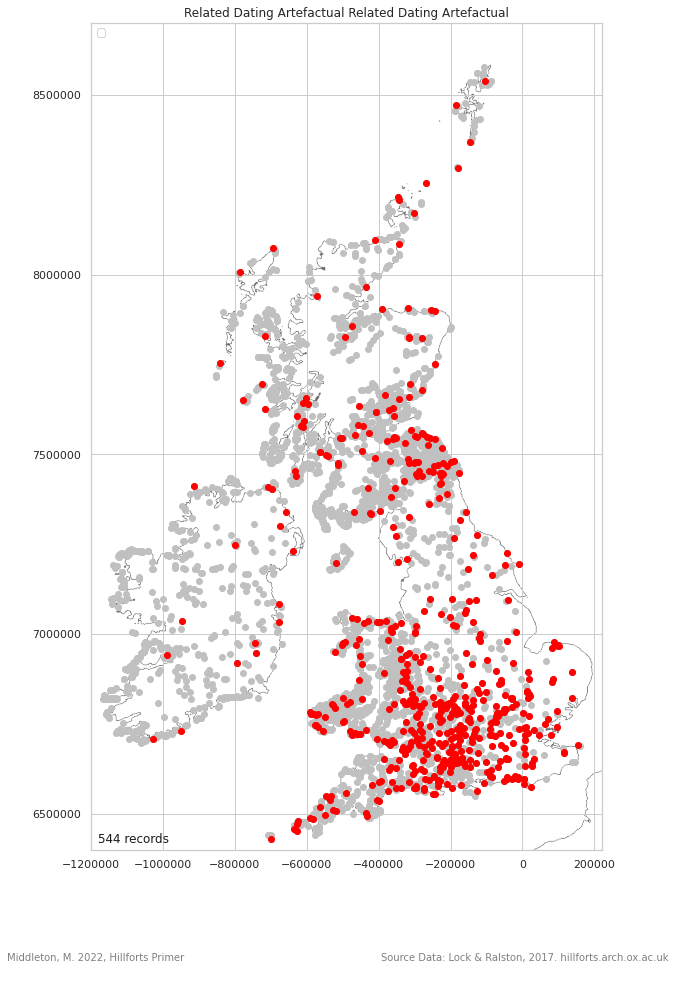

13.12%


In [ ]:
related_dating_artefactual_stats = plot_over_grey(location_dating_encodeable_plus_data, 'Related_Dating_Artefactual', 'Yes', 'Related_Dating_Artefactual') 

#### Map Related Dating Artefactual Density

There is a strong concentration of artifactual dates in south-central England.

Saving figure part03-033-density-related-dating-artefactual.png


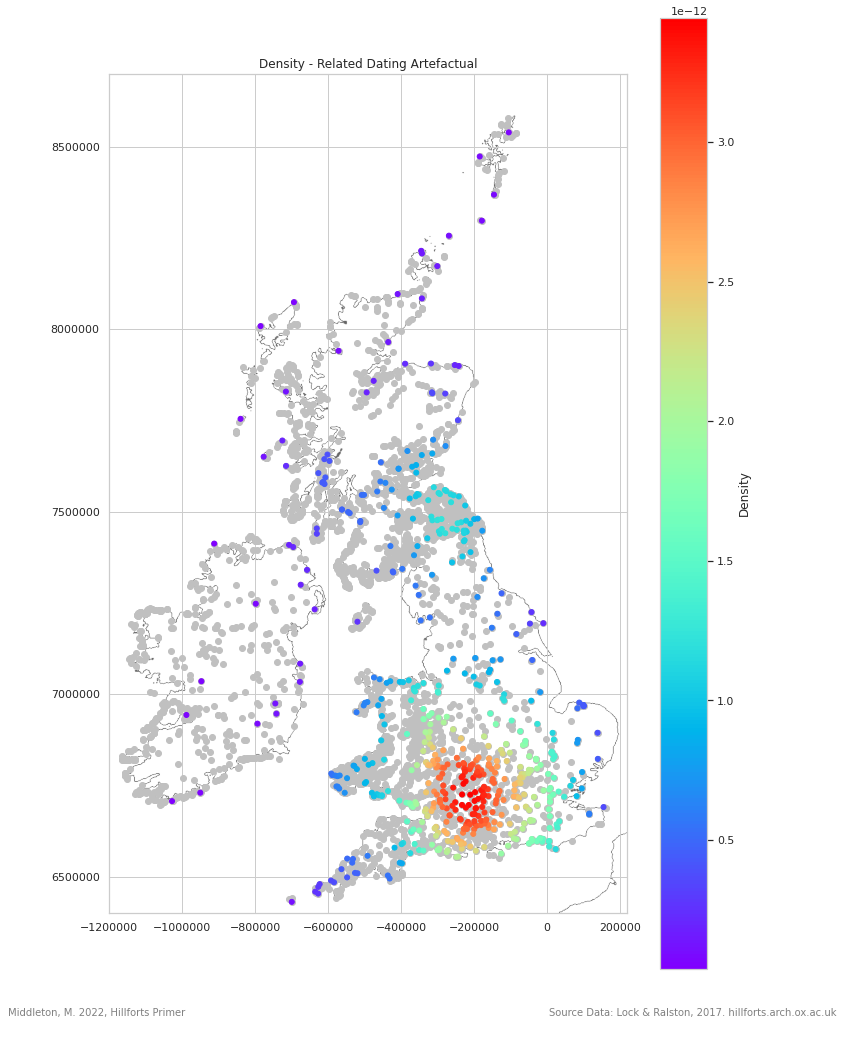

In [ ]:
plot_density_over_grey(related_dating_artefactual_stats, 'Related_Dating_Artefactual')

#### Map Related Dating Artefactual Showing Swindon and Oxford Orbits

When this cluster is plotted against the orbits of Oxford University and the head office of Historic England in Swindon there is a strong correlation between the two suggesting there is a sygnificant recording bias highlighted by this distribution.

Saving figure part03-034-related-dating-artefactual-plus-swindon-oxford.png


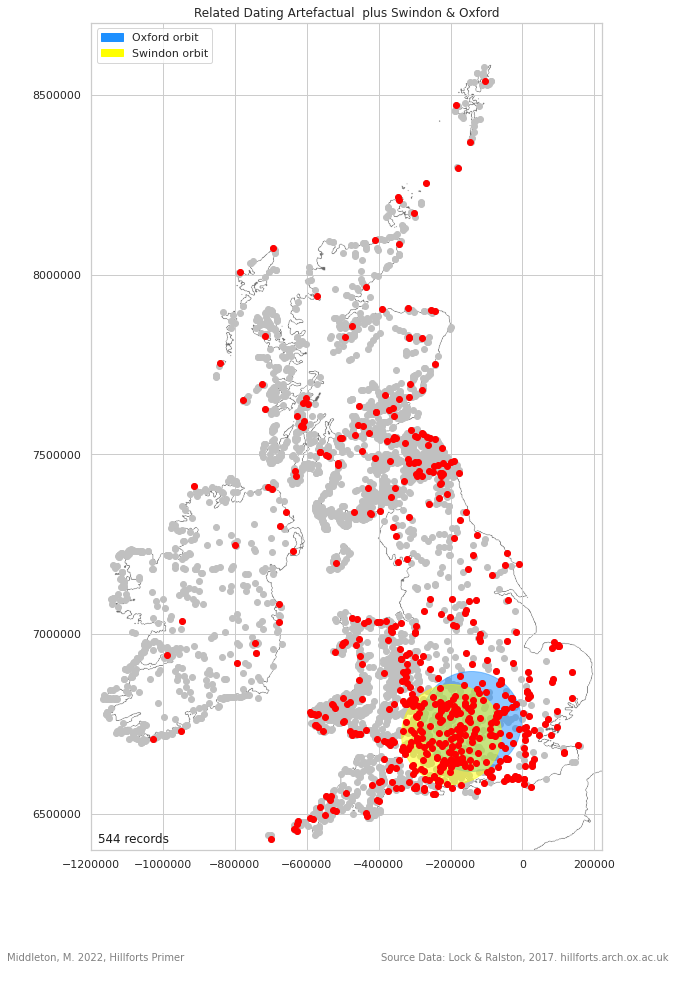

13.12%


In [ ]:
date_artif = plot_over_grey(location_dating_encodeable_plus_data, 'Related_Dating_Artefactual', 'Yes', ' plus Swindon & Oxford', False, False, True, True) 

#### Map Related Dating Morphology/Earthwork/Typology

Dating by means of morphology, earthwork and typology has a similar bias toward south central England and toward the northern border of Northumberland. Only 5.59% of hillforts have been dated in this way. Noteably, none are in Irealand.

Saving figure part03-035-related-dating-morph-earth-typo-morphology-earthwork-typology.png


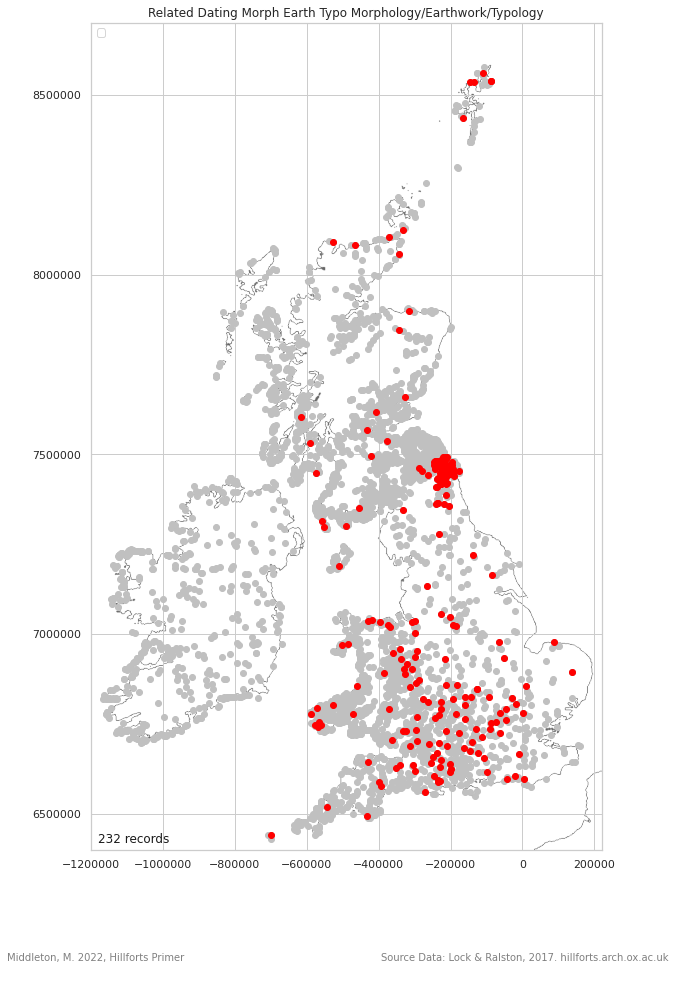

5.59%


In [ ]:
met_stats = plot_over_grey(location_dating_encodeable_plus_data, 'Related_Dating_Morph_Earth_Typo', 'Yes', 'Morphology/Earthwork/Typology') 

#### Map Related Dating Morphology/Earthwork/Typology Density

Saving figure part03-036-density-related-dating-morph-earth-typo.png


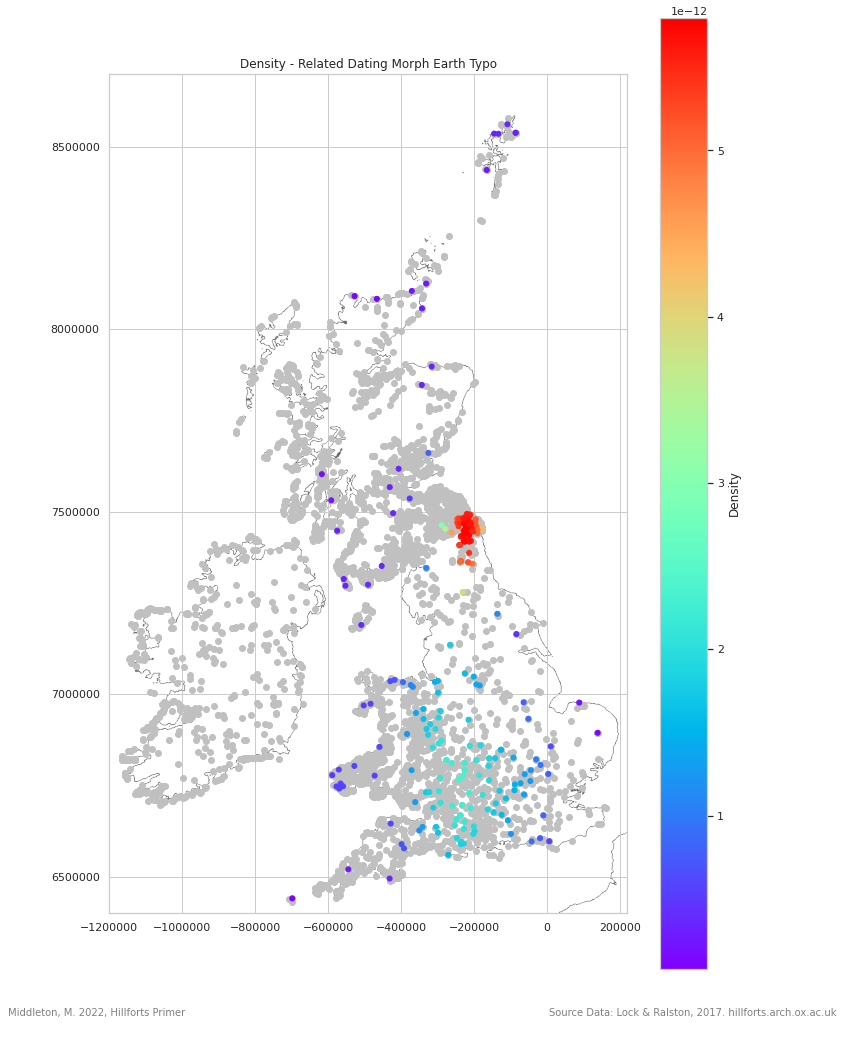

In [ ]:
plot_density_over_grey(met_stats, 'Related_Dating_Morph_Earth_Typo')

#### Map Related Dating C14

Carbon 14 dating (C14) is the most scientifically rigerours of the dating techniches recored in the atlas. Only 5.09% of hillforts have a C14 date but there does look to be a more even distribution of dates accross the area of the atlas.

Saving figure part03-037-related-dating-c14-related-dating-c14.png


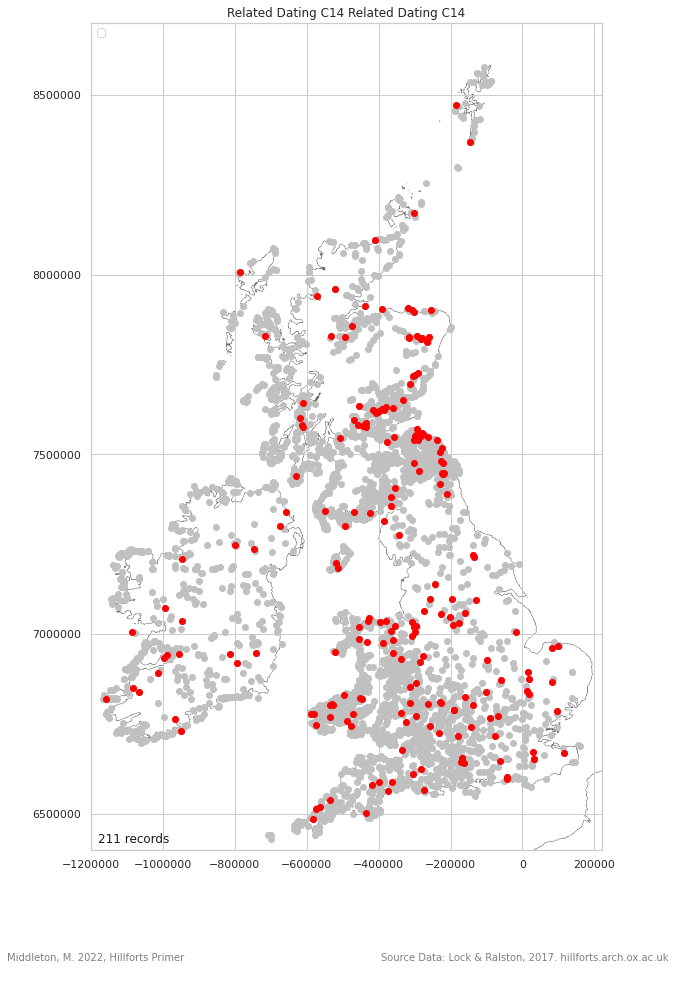

5.09%


In [ ]:
c14_stats = plot_over_grey(location_dating_encodeable_plus_data, 'Related_Dating_C14', 'Yes', 'Related_Dating_C14') 

#### Map Related Dating C14 Density

There is a cluster of dates in the eastern Scottish lowlands, particularly around Traprain Law in Eat Lothian and along the line of the Gask Ridge. There is a another, thin concentration, along the northern Welsh/English border, from the Shropshire Hills to the edge of Snowdonia.

Saving figure part03-038-density-related-dating-c14.png


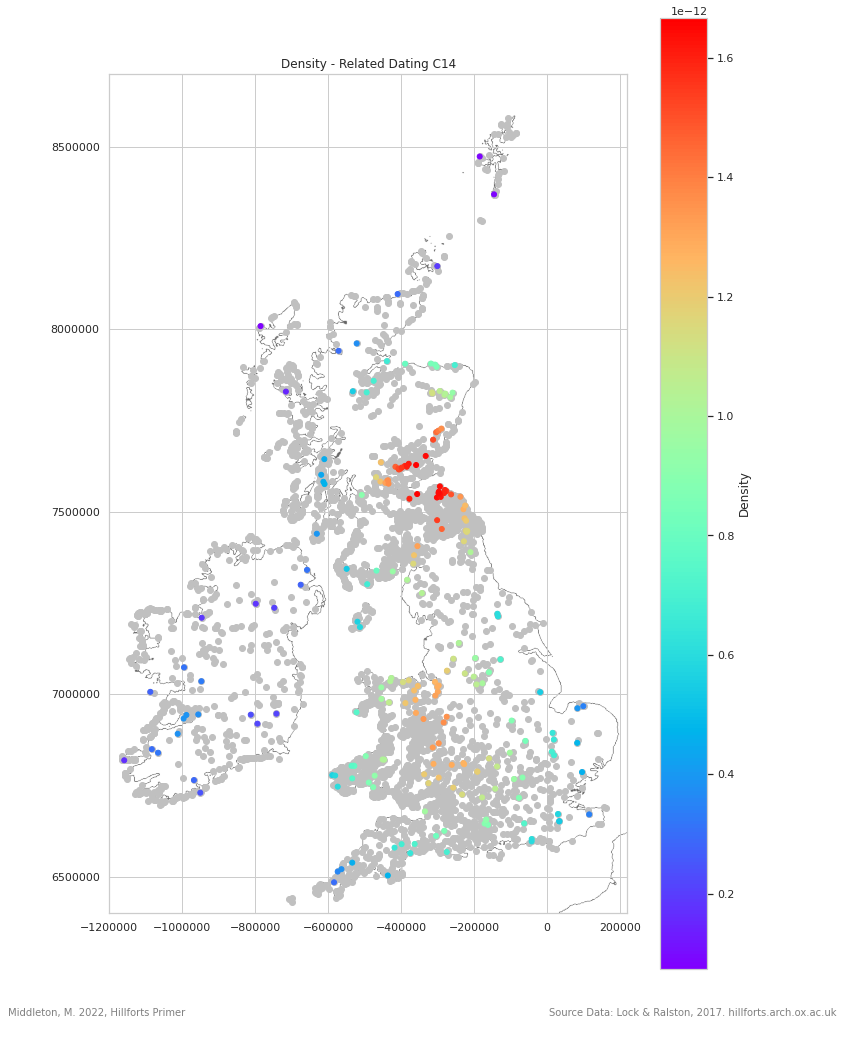

In [ ]:
plot_density_over_grey(c14_stats, 'Related_Dating_C14')

#### Map Related Dating Other

Fourty nine hillofts (1.18%) of hillforts are identified as having 'other' dating evidence. No further information is available via the online data.

Saving figure part03-039-related-dating-other-related-dating-other.png


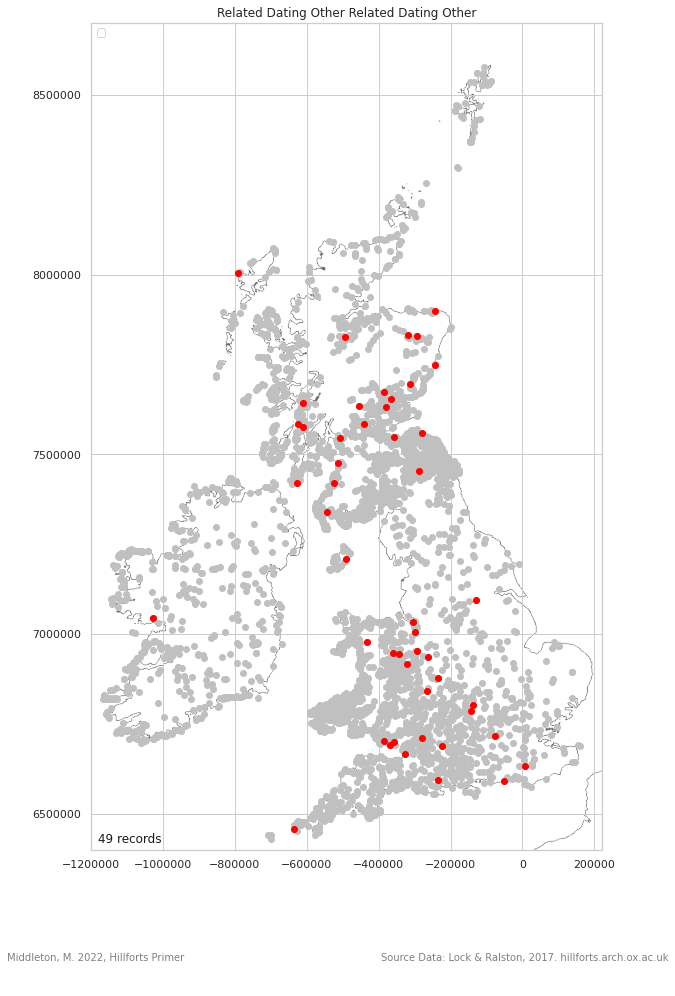

1.18%


In [ ]:
dating_other_stats = plot_over_grey(location_dating_encodeable_plus_data, 'Related_Dating_Other', 'Yes', 'Related_Dating_Other') 

#### Map Related Dating NA

Most (80.59%) of hillforts have no dating evidence.

Saving figure part03-040-related-dating-na-related-dating-na.png


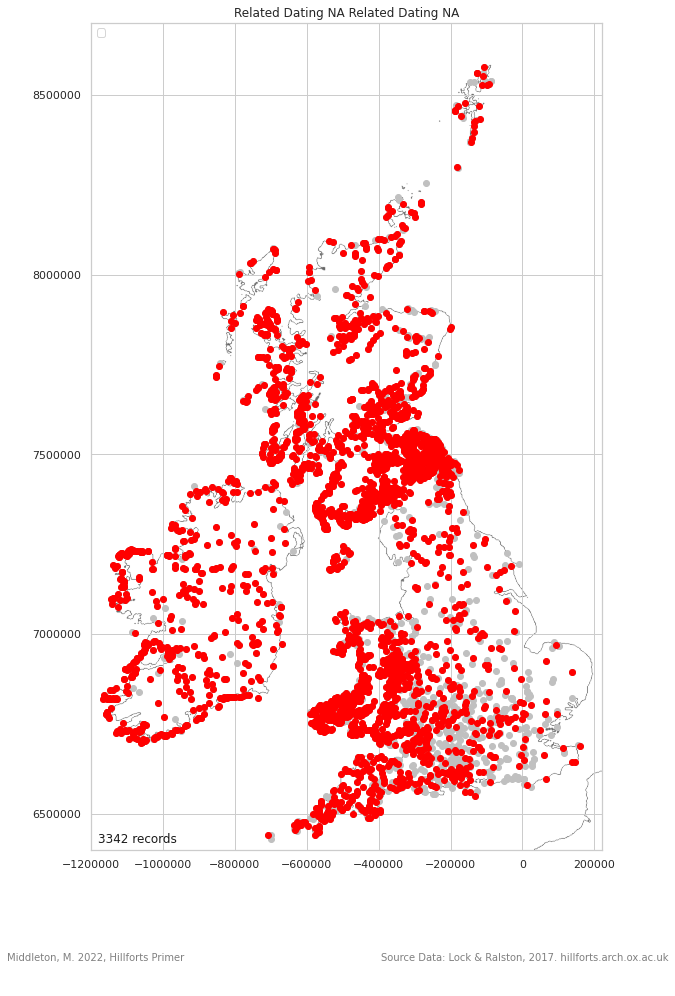

80.59%


In [ ]:
dating_na_stats = plot_over_grey(location_dating_encodeable_plus_data, 'Related_Dating_NA', 'Yes', 'Related_Dating_NA') 

### Dating Data Package

In [ ]:
dating_data_list = [dating_numeric_data, dating_text_data, dating_encodeable_data_plus]

### Dating Data Download Package

If you do not wish to download the data using this document, all the processed data packages, notebooks and images are available here:<br> https://github.com/MikeDairsie/Hillforts-Primer.<br>

In [ ]:
download(dating_data_list, 'Dating_package')

## Part 4: Investigations & Interior
https://colab.research.google.com/drive/1rNXpURD4K5aglEFhve_lPHWLXOflej2I?usp=sharing